# Problem Statment

The landscape of modern commerce has undergone a profound transformation, with e-commerce becoming a dominant force. Traditional brick-and-mortar models have given way to online platforms, enabling companies to connect directly with consumers. Industry leaders like Amazon and Flipkart have set the benchmark by offering extensive product selections at users’ fingertips.

In this rapidly growing space, companies like Ebuss are tapping into the momentum, building a strong presence across diverse product categories—from household items to electronics—to capture a significant share of the market.

However, thriving in such a competitive environment requires continuous innovation. To stand out, Ebuss must not only keep up with market leaders but strive to lead through technology-driven solutions that elevate the user experience.

As a Machine Learning Engineer at Ebuss, your mission is to develop a robust, sentiment-driven recommendation system that enhances product suggestions based on user feedback. This initiative involves several critical components:

#### Step 1: Exploratory Data Analysis (EDA) & Preprocessing
 1) Understand the Dataset: Analyze shape, null values, unique counts.

 2) Clean the Dataset: Remove duplicates, handle missing values, and standardize text fields.

 3) Visualizations: Plot rating distribution, sentiment distribution, top users/products, etc.

 4) Text Preprocessing: Apply lowercasing, remove punctuation and stopwords, perform lemmatization.

#### Step 2: Sentiment Analysis
1. Vectorization: Use TF-IDF or Bag-of-Words on reviews_text.

2. Model Training: Train any 3 of the following models:

3. Logistic Regression

4. Naive Bayes

5. Random Forest

6. XGBoost

7. Hyperparameter Tuning: Optimize model performance.

8. Evaluation: Use accuracy, precision, recall, and F1-score.

9. Best Model Selection: Choose the top-performing model for further use.



#### Step 3: Recommendation System
1) Collaborative Filtering: Implement User-User or Item-Item filtering using cosine similarity.

2) Top 20 Product Recommendations: Generate 20 product suggestions per user based on ratings.

3) Sentiment-Boosted Filtering: Refine recommendations by selecting the top 5 products with the most positive sentiment from the initial 20.

#### Step 4: Deployment
1) Flask Web App:

    Input: Username

    Output: 5 personalized product recommendations

2) Deployment on Railway: Integrate the UI, sentiment model, and recommendation logic into a live application

In [1]:
# ========================
# Basic & Data Libraries
# ========================
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis

# ========================
# Text Processing Libraries
# ========================
import re  # Regular expressions
import string  # String manipulation
import nltk  # Natural Language Toolkit
from nltk.corpus import stopwords  # Stopwords for filtering
import spacy  # NLP library
import en_core_web_sm  # SpaCy English model
nlp = en_core_web_sm.load()  # Load SpaCy model

# ========================
# Visualization Libraries
# ========================
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Advanced statistical plotting
# Show plots inline in Jupyter Notebook (remove if using a .py script)
%matplotlib inline  

# Plotly for interactive visualizations
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

# ========================
# Scikit-learn: Feature Extraction & Metrics
# ========================
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score, precision_score, accuracy_score, pairwise_distances

# ========================
# Scikit-learn: Models & Utilities
# ========================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

# ========================
# XGBoost
# ========================
import xgboost as xgb  # Extreme Gradient Boosting

In [2]:
# ========================
# Suppress Warnings
# ========================
import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings for cleaner output

# ========================
# Configure Pandas Display Options
# ========================

# Show up to 200 columns in outputs
pd.set_option('display.max_columns', 200)

# Show up to 300 characters in each cell
pd.set_option('display.max_colwidth', 300)

# Set numeric display precision to 2 decimal places
pd.set_option("display.precision", 2)

# Display up to 100 rows
pd.set_option('display.max_rows', 100)


### Exploratory Data Analysis

In [3]:
import os

# ========================
# Load Dataset
# ========================

# Define the filename (assuming the CSV file is in the same directory as the notebook)
file_name = "sample30.csv"

# Use os.path.join to make the path portable and avoid hardcoding Windows paths
file_path = os.path.join(os.getcwd(), file_name)

# Load the dataset into a pandas DataFrame
df_reviews = pd.read_csv(file_path)

# Preview the first 3 rows
df_reviews.head(3)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive


In [4]:
# ========================
# Basic Information
# ========================
print("=== DataFrame Info ===")
df_reviews.info()  # Overview of column data types and non-null counts

print("\n=== Missing Values per Column ===")
print(df_reviews.isnull().sum())  # Count of missing values

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), 

In [5]:
# ========================
# Shape & Structure
# ========================
print("\n=== Shape of the Data ===")
print(f"Rows: {df_reviews.shape[0]}")
print(f"Columns: {df_reviews.shape[1]}")

print("\n=== Feature Names ===")
print(df_reviews.columns.to_list())  # List of all column names

print("\n=== Total Missing Values ===")
print(df_reviews.isnull().values.sum())

print("\n=== Unique Values per Column ===")
print(df_reviews.nunique())


=== Shape of the Data ===
Rows: 30000
Columns: 15

=== Feature Names ===
['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'user_sentiment']

=== Total Missing Values ===
74980

=== Unique Values per Column ===
id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64


In [6]:
# ========================
# Review & User Stats
# ========================
print("\n=== Review-Level Statistics ===")
total_reviews = len(df_reviews['reviews_text'])
print("Number of reviews:", total_reviews)

unique_reviewers = df_reviews['reviews_username'].nunique()
print("Number of unique reviewers:", unique_reviewers)

reviewer_ratio = unique_reviewers / total_reviews
print("Proportion of unique reviewers:", round(reviewer_ratio, 3))


=== Review-Level Statistics ===
Number of reviews: 30000
Number of unique reviewers: 24914
Proportion of unique reviewers: 0.83


In [7]:
# ========================
# Ratings Overview
# ========================
print("\n=== Ratings Statistics ===")
if 'reviews_rating' in df_reviews.columns:
    print("Average rating score:", round(df_reviews['reviews_rating'].mean(), 3))
    print("Minimum rating:", df_reviews['reviews_rating'].min())
    print("Maximum rating:", df_reviews['reviews_rating'].max())
    print("Rating value counts:\n", df_reviews['reviews_rating'].value_counts().sort_index())
else:
    print("Column 'reviews_rating' not found in the dataset.")


=== Ratings Statistics ===
Average rating score: 4.483
Minimum rating: 1
Maximum rating: 5
Rating value counts:
 reviews_rating
1     1384
2      420
3     1345
4     6020
5    20831
Name: count, dtype: int64


In [8]:
# ========================
# Text Review Length
# ========================
print("\n=== Review Text Length Statistics ===")
df_reviews['review_length'] = df_reviews['reviews_text'].astype(str).apply(len)
print("Average review length:", df_reviews['review_length'].mean())
print("Max review length:", df_reviews['review_length'].max())
print("Min review length:", df_reviews['review_length'].min())


=== Review Text Length Statistics ===
Average review length: 183.05696666666665
Max review length: 5865
Min review length: 2


#### Data Cleaning and Preprocessing

In [9]:
# ========================
# Initial Inspection
# ========================
# Display initial shape and columns with missing values
print("Initial shape:", df_reviews.shape)
print("\nMissing values:\n", df_reviews.isnull().sum())

Initial shape: (30000, 16)

Missing values:
 id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
review_length               0
dtype: int64


In [10]:
# ========================
# 1. Remove Rows with Missing Sentiment
# ========================
# Filter out rows where user_sentiment is null (important target column for modeling)
df_reviews = df_reviews[~df_reviews['user_sentiment'].isnull()]
print("\nAfter removing rows with missing sentiment:", df_reviews.shape)


After removing rows with missing sentiment: (29999, 16)


In [11]:
# ========================
# 2. Drop Columns with Too Many Missing Values
# ========================
# Drop location-related fields that are sparsely populated or irrelevant to sentiment modeling
df_reviews.drop(['reviews_userCity', 'reviews_userProvince'], axis=1, inplace=True)
print("\nAfter dropping sparse columns:", df_reviews.shape)


After dropping sparse columns: (29999, 14)


In [12]:
# ========================
# 3. Drop Duplicate Rows (if any)
# ========================
before_dedup = df_reviews.shape[0]
df_reviews.drop_duplicates(inplace=True)
print(f"\nRemoved {before_dedup - df_reviews.shape[0]} duplicate rows.")


Removed 0 duplicate rows.


In [13]:

# ========================
# 4. Clean 'reviews_text'
# ========================
# Remove rows with missing or empty reviews
df_reviews = df_reviews[df_reviews['reviews_text'].notna()]
df_reviews = df_reviews[df_reviews['reviews_text'].str.strip() != '']
print("\nAfter removing empty reviews:", df_reviews.shape)


After removing empty reviews: (29999, 14)


In [14]:
# ========================
# 5. Map Sentiment to Numeric Values
# ========================
# Convert 'Positive' to 1 and 'Negative' to 0 for modeling purposes
df_reviews['user_sentiment'] = df_reviews['user_sentiment'].map({'Positive': 1, 'Negative': 0})

In [15]:
# ========================
# Final Check
# ========================
print("\nFinal dataset shape:", df_reviews.shape)
print("\nRemaining missing values:\n", df_reviews.isnull().sum())


Final dataset shape: (29999, 14)

Remaining missing values:
 id                         0
brand                      0
categories                 0
manufacturer             141
name                       0
reviews_date              46
reviews_didPurchase    14067
reviews_doRecommend     2570
reviews_rating             0
reviews_text               0
reviews_title            190
reviews_username          63
user_sentiment             0
review_length              0
dtype: int64


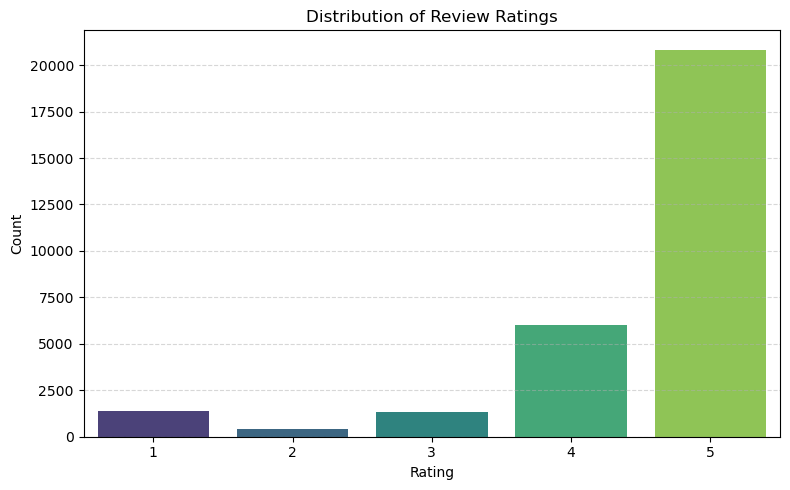

In [16]:
# ========================
# 1. Distribution of Ratings
# ========================
plt.figure(figsize=(8,5))
sns.countplot(x='reviews_rating', data=df_reviews, palette='viridis')
plt.title("Distribution of Review Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Most users rated the product 5 stars, reflecting strong satisfaction. The minimal number of low ratings (1–3) creates a distribution heavily weighted toward positive reviews.

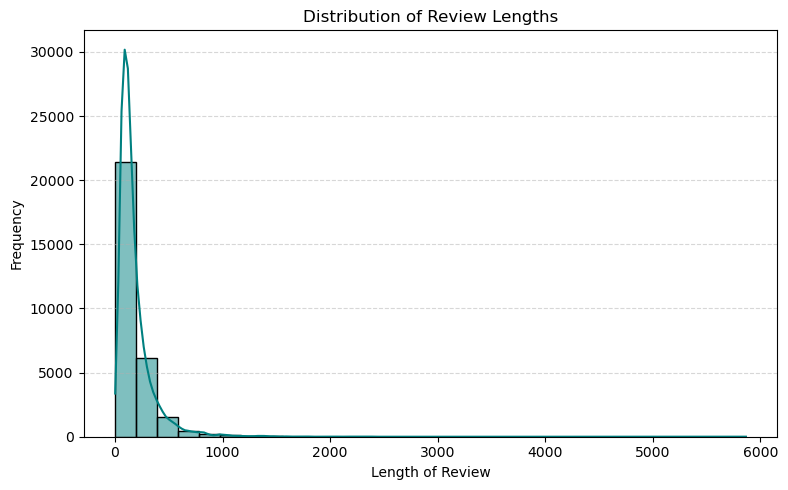

In [17]:
# ========================
# 2. Review Length Distribution
# ========================
plt.figure(figsize=(8,5))
sns.histplot(df_reviews['review_length'], bins=30, kde=True, color='teal')
plt.title("Distribution of Review Lengths")
plt.xlabel("Length of Review")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The distribution is slightly right-skewed but still follows a normal pattern.

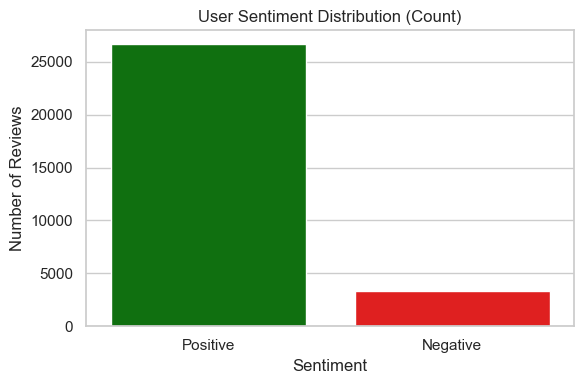

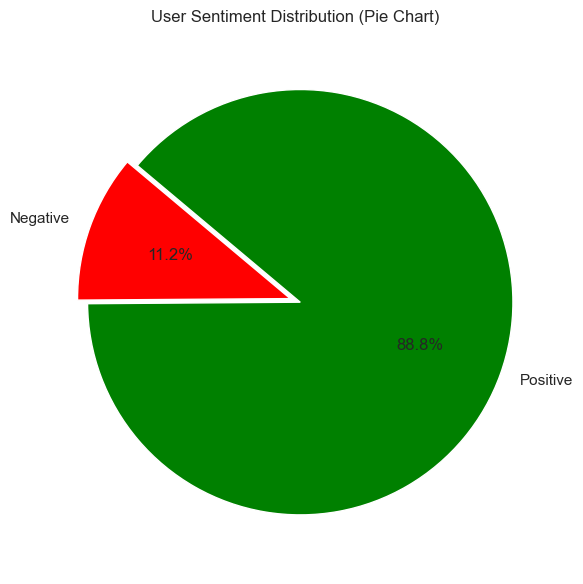

In [18]:
# ========================
# 3. User Sentiment Analysis
# ========================

# Set style for consistency
sns.set(style='whitegrid')

# Convert numerical sentiment to label for display only
df_reviews['sentiment_label'] = df_reviews['user_sentiment'].map({1: 'Positive', 0: 'Negative'})

# Count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment_label', data=df_reviews, palette={'Positive': 'green', 'Negative': 'red'})
plt.title('User Sentiment Distribution (Count)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

# ========================
# Pie Chart of User Sentiment
# ========================
# Count values
sentiment_counts = df_reviews['user_sentiment'].value_counts().sort_index()

# Labels and colors
labels = ['Negative', 'Positive']
colors = ['red', 'green']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=[0.05, 0]  # Slightly separate the Negative slice
)
plt.title('User Sentiment Distribution (Pie Chart)')
plt.axis('equal')
plt.tight_layout()
plt.show()

The dataset shows a strong imbalance toward positive sentiment, indicating general customer satisfaction. However, this imbalance should be accounted for during model training, as it may introduce bias toward the dominant class.

In [19]:
# ========================
# 1. Review Rating Summary by Sentiment (Before Correction)
# ========================
# Descriptive stats for ratings labeled as Positive (user_sentiment = 1)
print("Descriptive stats for POSITIVE sentiment:")
print(df_reviews[df_reviews["user_sentiment"] == 1]["reviews_rating"].describe())

Descriptive stats for POSITIVE sentiment:
count    26632.00
mean         4.56
std          0.87
min          1.00
25%          4.00
50%          5.00
75%          5.00
max          5.00
Name: reviews_rating, dtype: float64


In [20]:
# Descriptive stats for ratings labeled as Negative (user_sentiment = 0)
print("\nDescriptive stats for NEGATIVE sentiment:")
print(df_reviews[df_reviews["user_sentiment"] == 0]["reviews_rating"].describe())


Descriptive stats for NEGATIVE sentiment:
count    3367.00
mean        3.87
std         1.54
min         1.00
25%         3.00
50%         5.00
75%         5.00
max         5.00
Name: reviews_rating, dtype: float64


In [21]:
# ========================
# 2. Check for Label Inconsistencies
# ========================
# Positive sentiment but rating less than 4 (suspicious case)
print("\nPositive sentiment with rating < 4:")
df_reviews[(df_reviews["user_sentiment"] == 1) & (df_reviews["reviews_rating"] < 4)][["reviews_title", "reviews_text", "reviews_rating"]]



Positive sentiment with rating < 4:


,reviews_title,reviews_text,reviews_rating
9,Don't buy,Got as a surprise for my husband there is nothing special about it just a lube save the money and get plain KY if you just need a lube wish I could return it for a refund,1
11,Waste of Money,Purchased this thinking it would have some sort of warming effect but it's the same as the original. Don't waste your money.,1
14,Disappointed,First time purchase of this type of product. Maybe I expected too much. Did not think there was any warming feeling at all. Left us sticky! Even after trying to was it off.,1
18,Pretty nice,"I bought this because it had better reviews than the his and hers jelly, but I feel like it didn't work that well for us. It was kind of warm-feeling, but that's about it. I guess I don't know what's supposed to happen! Lol",3
54,New formula is terrible,"I used (and loved) this product for several years until they changed it. It used to moisturize my skin and left it feeling soft. Now, it sits on top of my skin and is never absorbed. It just leaves a slimy film on my skin. I will no longer purchase this product.",1
...,...,...,...
29050,Didn't Do Much For Dryness,"I received this product from Influenster. I absolutely love the whole system together, it made my hair oil-free for 48 hours. But I expected the conditioner to do more for the dryness at the ends of my hair like advertised. I didn't really notice much of a different in dryness before and after I...",3
29051,Not the best,"I used this product for a month straight before reviewing it and I'm not really all that impressed. My hair still gets pretty oily, my ends are still dry.... I mean it cleaned my hair I guess. It's nothing spectacular really. It didn't make my hair extremely soft but it didn't make my hair feel ...",3
29053,clay conditioning,Got this item as a compliment from influenster but it really made my hair smooth and shining after the usage. This review was collected as part of a promotion.,3
29054,Eh,"I am not in love with the conditioner. The clay mask and shampoo are GREAT but I didn't feel like this did anything for my ends. I would buy the other two, but not this, probably because I have fine hair and my ends need deep conditioning. Smells great though! I got this product free for testing...",3


In [22]:
# Negative sentiment but rating >= 4 (suspicious case)
print("\nNegative sentiment with rating >= 4:")
df_reviews[(df_reviews["user_sentiment"] == 0) & (df_reviews["reviews_rating"] >= 4)][["reviews_title", "reviews_text", "reviews_rating"]]



Negative sentiment with rating >= 4:


,reviews_title,reviews_text,reviews_rating
92,hydrating but not too heavy,It hydrates my skin. It is not too thick and heavy when I put it on. This review was collected as part of a promotion.,4
96,This product has made a real difference on my skin,In only a week I can see the difference in my skin on my face. This review was collected as part of a promotion.,4
100,Noticed a difference in just two weeks!,This product has made my skin smoother and supple after only two weeks. It absorbs well and leaves no residue. This review was collected as part of a promotion.,4
106,Very rich cream,"I like to use this cream on my neck and collarbone to help keep my skin well moisturized, but it can be a little heavy for the skin on my face This review was collected as part of a promotion.",4
117,Not greasy,"I finally found a moisturizing product that will absorb completely and not leave my skin feeling like it's suffocating. I apply it, and it feels like there is nothing there but my skin looks smoother. This review was collected as part of a promotion.",4
...,...,...,...
29818,Great Product,"I received a complimentary sample of this product and it worked so well for my hair! I have very thick hair so my roots always get oily and my ends are dry, this left my hair the cleanest it's felt in a long time. Will def recommend this to my family and friends! This review was collected as par...",5
29855,Great,This has prolonged the color in my hair! Not only is my hair healthier but I think I'll have to visit my stylist less! This review was collected as part of a promotion.,5
29858,Makes my hair soft and shiny without excess oil!,"This conditioner makes my hair very soft without weighing it down! I was afraid it'd make my roots more oily and weight them down, but it doesn't one bit! My hair is colored, and it hasn't faded out the color either! I'd highly recommend giving this a try! This review was collected as part of a ...",5
29862,Great Conditioner,This conditioner has become a staple in my hair regimen This review was collected as part of a promotion.,5


In [23]:
# ========================
# 3. Crosstab to View Distribution Before Correction
# ========================
print("\nCrosstab of sentiment vs rating (BEFORE correction):")
pd.crosstab(df_reviews["user_sentiment"], df_reviews["reviews_rating"], margins=True)



Crosstab of sentiment vs rating (BEFORE correction):


reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,597,140,220,550,1860,3367
1,787,280,1125,5470,18970,26632
All,1384,420,1345,6020,20830,29999


In [24]:
# ========================
# 4. Correct the Sentiment Based on Rating
# ========================
# Define new sentiment rule: Rating >= 3 → Positive, Rating > 0 and < 3 → Negative
def review_sentiment_clear(x):
    if x >= 3:
        return 1  # Positive
    elif x > 0 and x < 3:
        return 0  # Negative
    else:
        return None  # Optional: handle edge cases (e.g., rating == 0 or missing)


In [25]:
# Apply the rule to update 'user_sentiment'
df_reviews['user_sentiment'] = df_reviews['reviews_rating'].apply(review_sentiment_clear)

In [26]:
# ========================
# 5. Verify Results After Correction
# ========================
# Crosstab again to see how sentiment aligns with rating
print("\nCrosstab of sentiment vs rating (AFTER correction):")
pd.crosstab(df_reviews["user_sentiment"], df_reviews["reviews_rating"], margins=True)

# Check updated sentiment distribution
print("\nUpdated sentiment class distribution:")
df_reviews["user_sentiment"].value_counts()


Crosstab of sentiment vs rating (AFTER correction):

Updated sentiment class distribution:


user_sentiment
1    28195
0     1804
Name: count, dtype: int64

In [27]:
# Show first few rows
df_reviews.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,review_length,sentiment_label
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,1,201,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,1,62,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,1,12,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,rebecca,0,696,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,0,132,Negative


### Data Visualization

In [28]:
# Set up plot aesthetics
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

In [29]:
# ================================
# 0. Data Cleaning Essentials
# ================================
# Remove rows with missing usernames
df_reviews = df_reviews[~df_reviews.reviews_username.isnull()]

# Combine title and text into a full review
df_reviews["reviews_title"] = df_reviews["reviews_title"].fillna('')
df_reviews["reviews_full_text"] = df_reviews[['reviews_title', 'reviews_text']].agg('. '.join, axis=1).str.lstrip('. ')

# Calculate word count
df_reviews["review_length"] = df_reviews["reviews_text"].apply(lambda x: len(str(x).split()))

# Create readable sentiment label
df_reviews['sentiment_label'] = df_reviews['user_sentiment'].map({1: 'Positive', 0: 'Negative'})

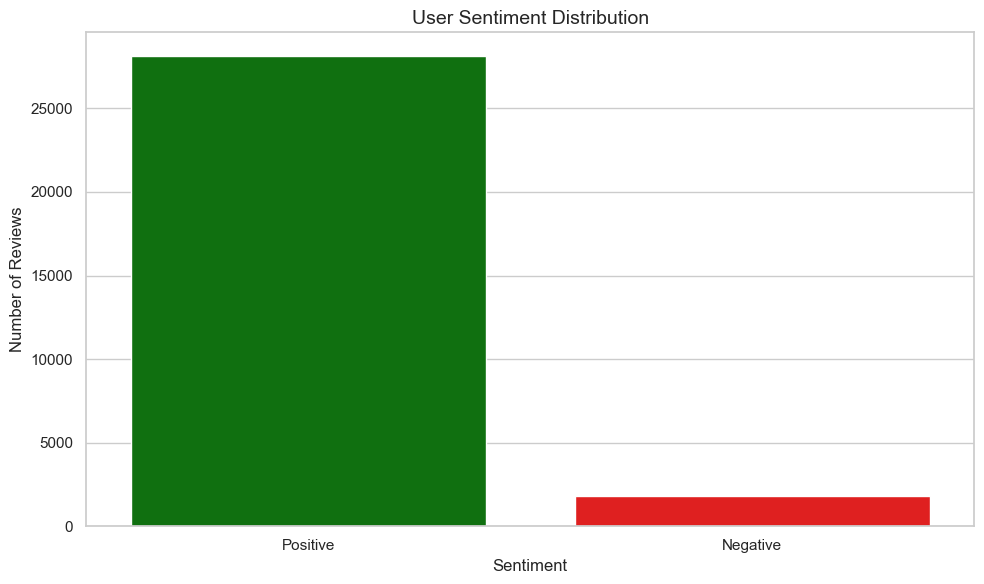

In [30]:
# ================================
# 1. Sentiment Distribution
# ================================
sns.countplot(data=df_reviews, x='sentiment_label', palette={'Positive': 'green', 'Negative': 'red'})
plt.title("User Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


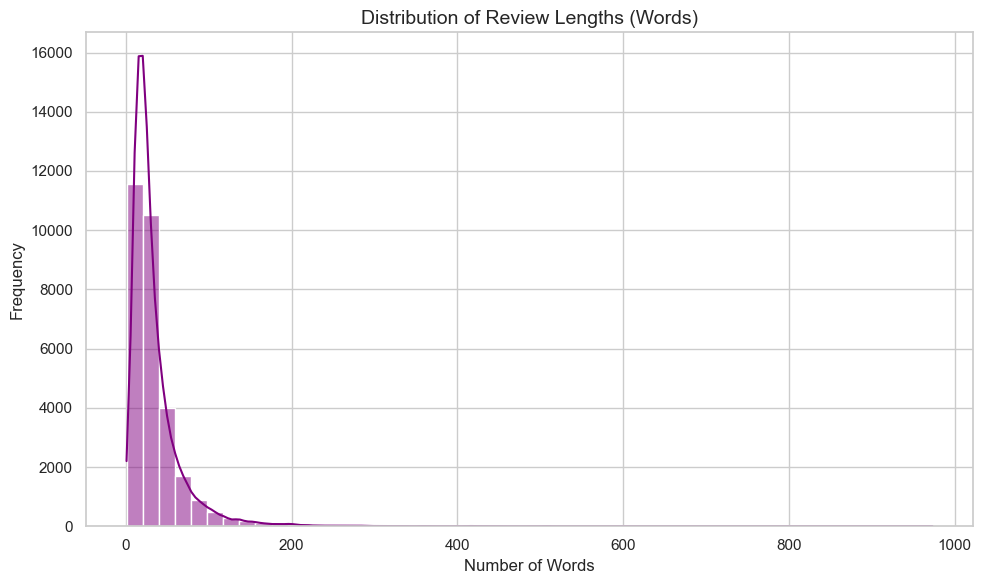

In [31]:
# ================================
# 2. Review Length Distribution
# ================================
sns.histplot(df_reviews['review_length'], bins=50, kde=True, color='purple')
plt.title("Distribution of Review Lengths (Words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

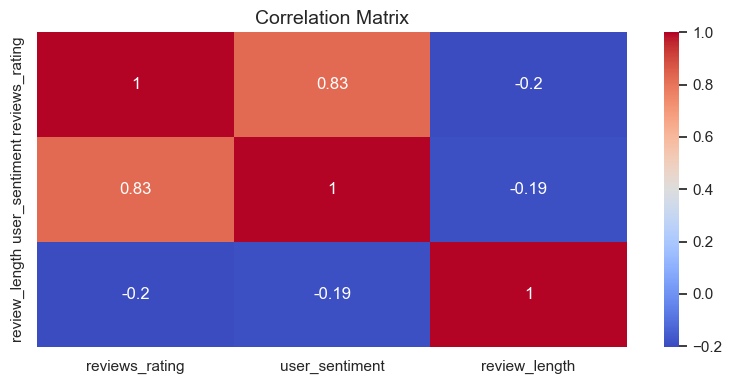

In [32]:
# ================================
# 3. Correlation Matrix
# ================================
plt.figure(figsize=(8, 4))
sns.heatmap(df_reviews.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

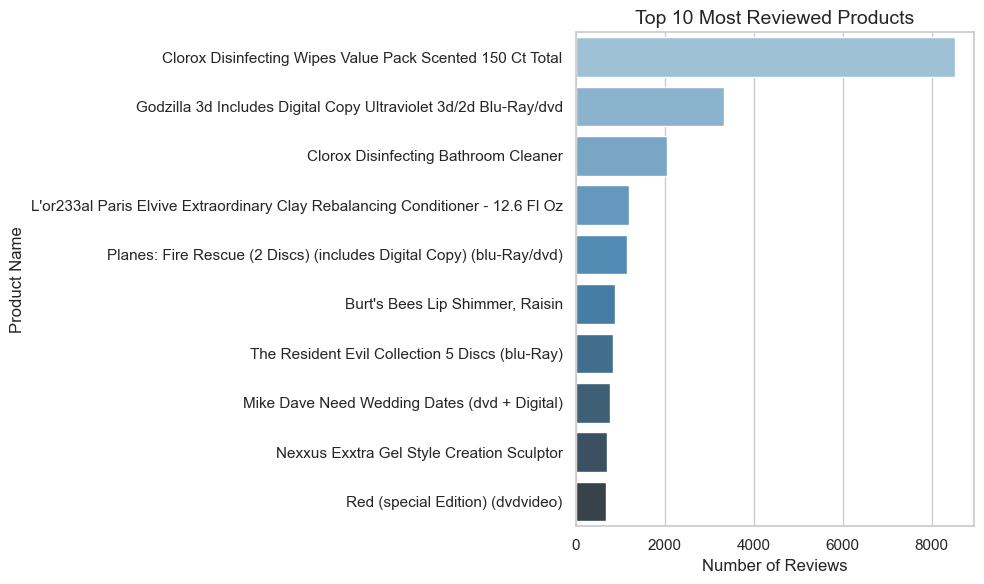

In [33]:
# ================================
# 4. Top 10 Most Reviewed Products
# ================================
top_products = df_reviews['name'].value_counts().head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='Blues_d')
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Number of Reviews")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

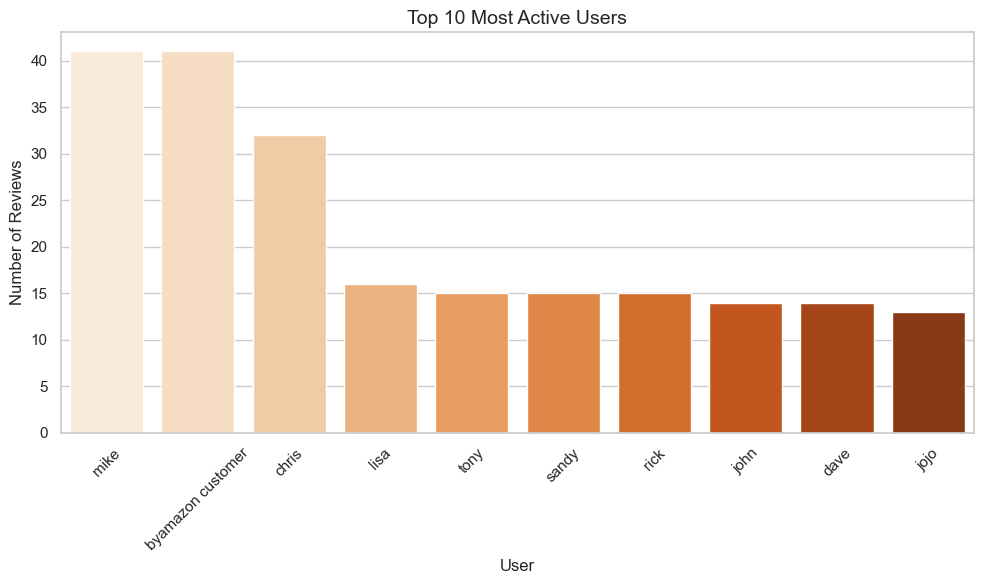

In [34]:
# ================================
# 5. Top 10 Most Active Users
# ================================
top_users = df_reviews['reviews_username'].value_counts().head(10)
sns.barplot(x=top_users.index, y=top_users.values, palette='Oranges')
plt.title("Top 10 Most Active Users")
plt.ylabel("Number of Reviews")
plt.xlabel("User")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

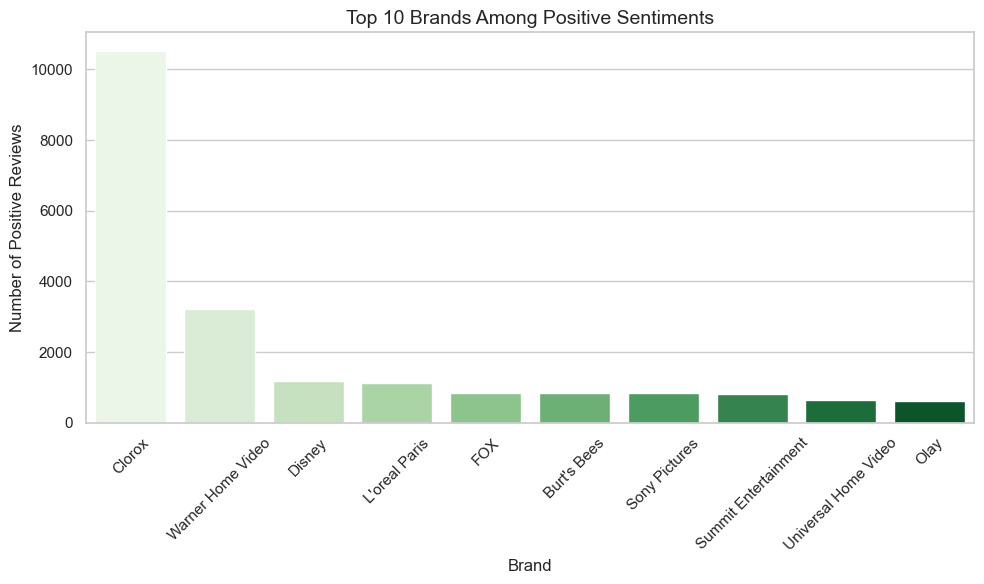

In [35]:
# ================================
# 6. Top 10 Brands with Positive Sentiment
# ================================
top_positive_brands = df_reviews[df_reviews['user_sentiment'] == 1]['brand'].value_counts().head(10)
sns.barplot(x=top_positive_brands.index, y=top_positive_brands.values, palette='Greens')
plt.title('Top 10 Brands Among Positive Sentiments')
plt.xlabel('Brand')
plt.ylabel('Number of Positive Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

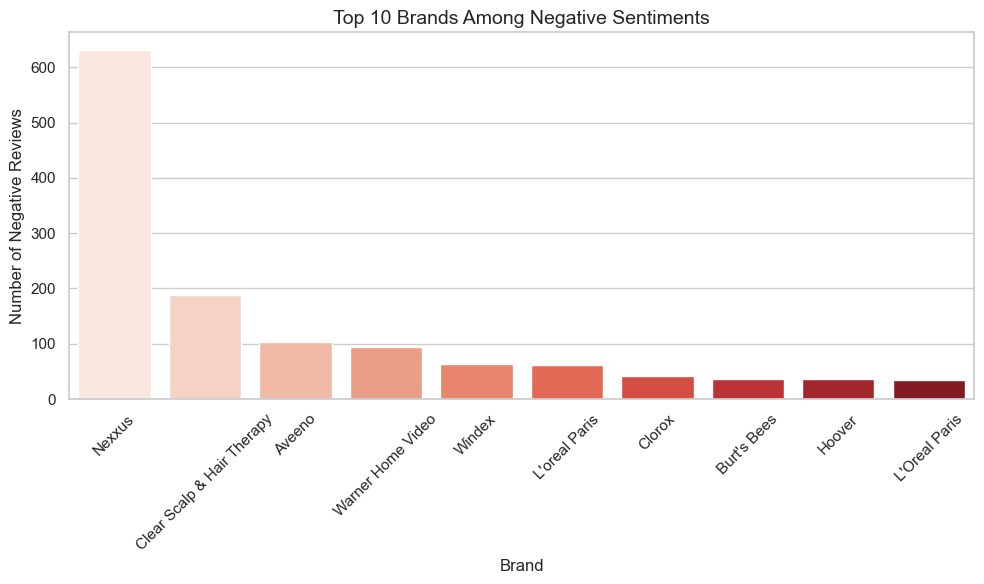

In [36]:
# ================================
# 7. Top 10 Brands with Negative Sentiment
# ================================
top_negative_brands = df_reviews[df_reviews['user_sentiment'] == 0]['brand'].value_counts().head(10)
sns.barplot(x=top_negative_brands.index, y=top_negative_brands.values, palette='Reds')
plt.title('Top 10 Brands Among Negative Sentiments')
plt.xlabel('Brand')
plt.ylabel('Number of Negative Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

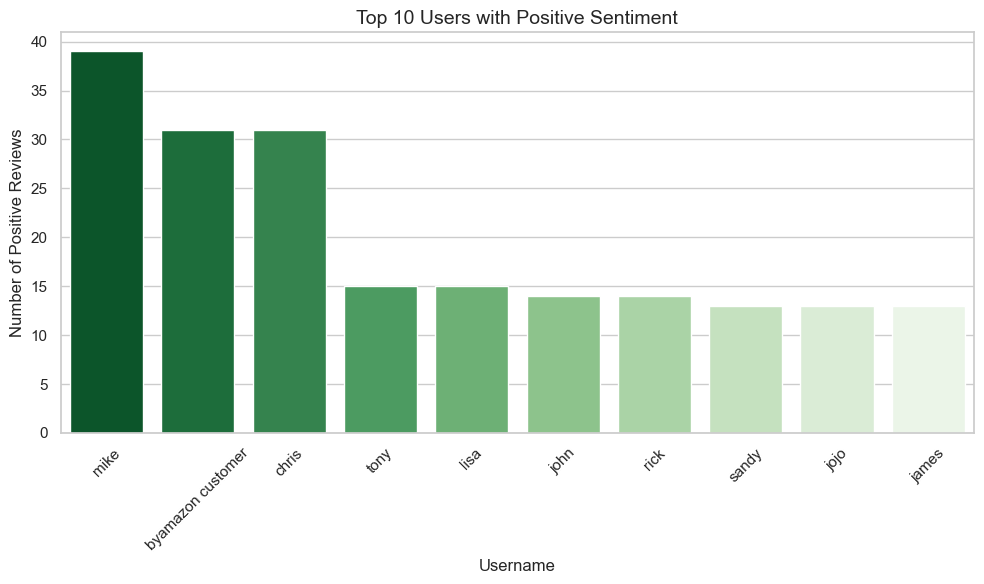

In [37]:
# ================================
# 8. Top 10 Users with Positive Sentiment
# ================================
top_positive_users = df_reviews[df_reviews['user_sentiment'] == 1]['reviews_username'].value_counts().head(10)
sns.barplot(x=top_positive_users.index, y=top_positive_users.values, palette='Greens_r')
plt.title('Top 10 Users with Positive Sentiment')
plt.xlabel('Username')
plt.ylabel('Number of Positive Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

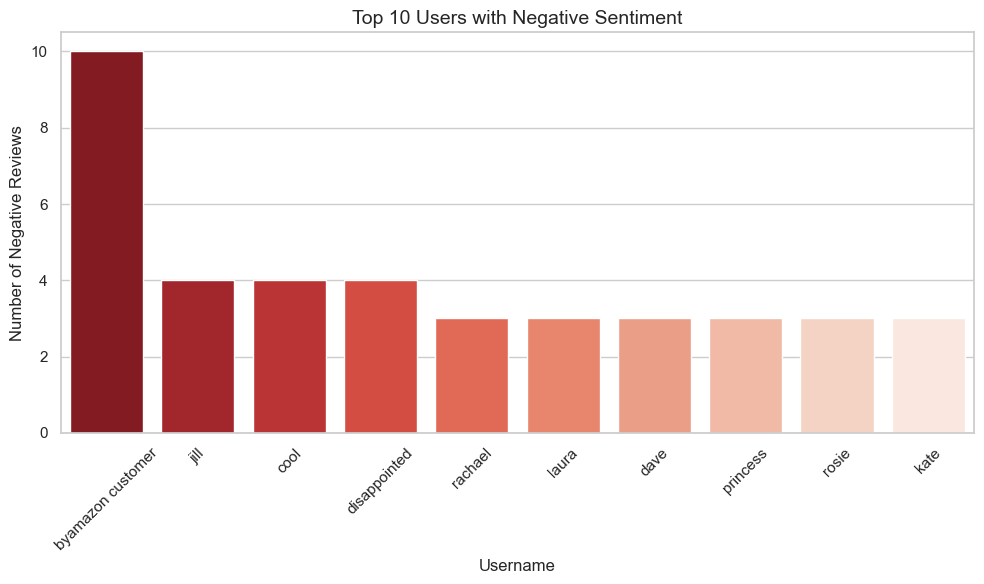

In [38]:
# ================================
# 9. Top 10 Users with Negative Sentiment
# ================================
top_negative_users = df_reviews[df_reviews['user_sentiment'] == 0]['reviews_username'].value_counts().head(10)
sns.barplot(x=top_negative_users.index, y=top_negative_users.values, palette='Reds_r')
plt.title('Top 10 Users with Negative Sentiment')
plt.xlabel('Username')
plt.ylabel('Number of Negative Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
# ================================
# 10. Sentiment vs Rating Crosstab (Table)
# ================================
print("\nCrosstab of Sentiment vs Rating:")
display(pd.crosstab(df_reviews["user_sentiment"], df_reviews["reviews_rating"], margins=True))


Crosstab of Sentiment vs Rating:


reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,1373,418,0,0,0,1791
1,0,0,1344,6010,20791,28145
All,1373,418,1344,6010,20791,29936


In [40]:
df_reviews.isnull().sum()

id                         0
brand                      0
categories                 0
manufacturer             141
name                       0
reviews_date              40
reviews_didPurchase    14005
reviews_doRecommend     2541
reviews_rating             0
reviews_text               0
reviews_title              0
reviews_username           0
user_sentiment             0
review_length              0
sentiment_label            0
reviews_full_text          0
dtype: int64

### Text Preprocessing for Modelling

In [41]:
# ================================
# 1. Imports & Setup
# ================================

import html
from wordcloud import WordCloud

from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

# Download required NLTK data (only needed once)
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger_eng')


In [42]:
# Set English stopwords
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [43]:
# ================================
# 2. Sample Review Display (Optional Check)
# ================================
# Quick check of random rows before cleaning
df_reviews[["reviews_full_text", "user_sentiment"]].sample(10)

,reviews_full_text,user_sentiment
16117,Lip Shimmer. I received some of these as a gift and love them. They keep my lips smooth and the shimmer is just right to keep my lips looking great. A tiny bit goes a long way. This review was collected as part of a promotion.,1
257,Love my olay. I love how my face and skin feel. I have tried other products but I always go right back to my olay. This review was collected as part of a promotion.,1
19591,"kids...need i say more!. kids make messes. and kids leave messes. either way, they're great for cleaning up after your kids, or someone elses'. This review was collected as part of a promotion.",1
22501,"Dried My Scalp. Use to love this line. However, since the new formula since September, my head has itched non stop.",0
1494,"The Yes to Carrots Hydrating Shower Gel is fabulous!. The Yes to Carrots Hydrating Shower Gel is fabulous and a must have for anyone who wants to indulge in a luxurious shower/bath! Your skin is refreshed and moisturized. I love the light, sweet smelling fragrance and it is a healthy treat for y...",1
9818,Love this product!. This is what I use to clean my bathroom. Smells great and does a great job too! Love how I can just clean then throw away.,1
5276,All 5 Resident Evil + digital. Great deal. All five movies on bluy ray plus all five digitally. If you like series get it.,1
14425,great product. great cleaning power and easy to use. Take them any where easy to travel with This review was collected as part of a promotion.,1
3703,Lasting Memories!. I loved this at my wedding! I put the little cards in a fabric picture holder and let guests write on them at their leisure during the reception. I also passed them out at my rehearsal diner! I will cherish the wishes written on there forever! This was a great addition to my w...,1
27016,"Great CD. Cd is very great quality. Great, Easy listening music.",1


In [44]:
# ================================
# 3. Select Relevant Columns for NLP
# ================================
df_clean = df_reviews[['id', 'name', 'reviews_full_text', 'user_sentiment']].copy()

In [45]:
# ================================
# 4. Text Cleaning Function
# ================================
def clean_text(text):
    text = text.lower()                             # Lowercase
    text = text.strip()                             # Remove leading/trailing spaces
    text = html.unescape(text)                      # Unescape HTML characters
    text = re.sub(r"\[.*?\]", "", text)             # Remove content inside brackets
    text = re.sub(r"\S*\d\S*", "", text)            # Remove words containing numbers
    text = re.sub(r"http\S+", "", text)             # Remove URLs
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text


In [46]:
# Apply basic cleaning
df_clean["reviews_text"] = df_clean["reviews_full_text"].apply(clean_text)

In [47]:
# ================================
# 5. Stopword Removal Function
# ================================
def remove_stopword(text):
    words = [word for word in text.split() if word.isalpha() and word not in stop_words]
    return " ".join(words)

In [48]:
# ================================
# 6. POS Mapper for Lemmatization
# ================================
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    return wordnet.NOUN  # Default to noun

In [49]:
# ================================
# 7. Lemmatization Function
# ================================
def lemma_text(text):
    filtered_text = remove_stopword(text)
    word_pos_tags = pos_tag(word_tokenize(filtered_text))  # Tokenize and tag
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in word_pos_tags]
    return " ".join(lemmatized_words)


In [50]:
# Apply full preprocessing: clean + stopword removal + lemmatization
df_clean["reviews_text_cleaned"] = df_clean["reviews_text"].apply(lemma_text)


In [51]:
# ================================
# 8. Display Result
# ================================
df_clean.head()

,id,name,reviews_full_text,user_sentiment,reviews_text,reviews_text_cleaned
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome. i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,1,just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it rating all the way her metaphors are just crazy,awesome love album good hip hop side current pop sound hype listen everyday gym give rating way metaphor crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor. This review was collected as part of a promotion.,1,good good flavor this review was collected as part of a promotion,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor.,1,good good flavor,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed. I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation...",0,disappointed i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what w...,disappoint read review look buy one couple lubricant ultimately disappointed didnt even live review read starter neither boyfriend could notice sort enhanced captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation. My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,0,irritation my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel,irritation husband buy gel u gel caused irritation felt like burn skin wouldnt recommend gel


In [52]:
# ================================
# 9. Word Cloud Visualization
# ================================
wordcloud = WordCloud(
    stopwords=stop_words,
    max_words=200,
    background_color='white',
    colormap='viridis',
    width=800,
    height=600
).generate(" ".join(df_clean["reviews_text_cleaned"]))

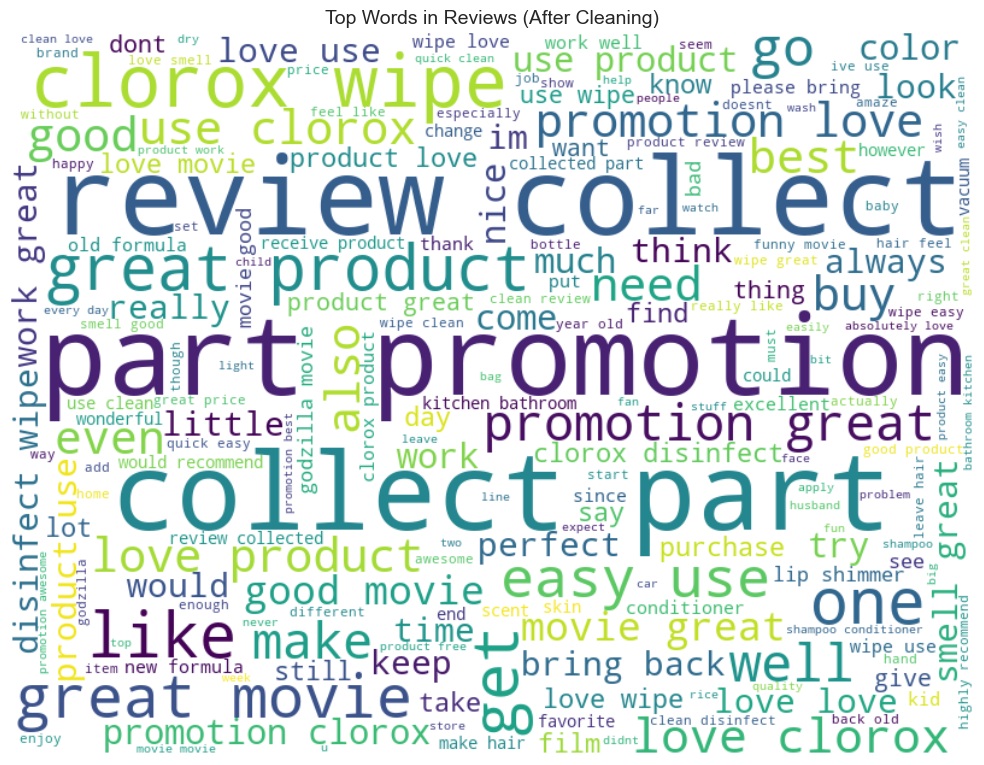

In [53]:
# Display the Word Cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Words in Reviews (After Cleaning)", fontsize=14)
plt.tight_layout()
plt.show()

In [54]:
# ================================
# 10. Final Output Variables for Modeling
# ================================
X = df_clean['reviews_text_cleaned']
y = df_clean['user_sentiment']

### Feature Extraction

In [55]:
# ============================================
# 1. Check Target Class Distribution (Proportions)
# ============================================

# Ensure 'y' is clean and updated
y = df_clean['user_sentiment']

# Count how many unique classes (e.g., 0 and 1)
no_of_classes = y.nunique()

# Display the percentage of each sentiment class
print("Class distribution (%):")
for i in range(no_of_classes):
    class_percent = 100 * y.value_counts()[i] / y.count()
    print(f"Percent of {i}s: {round(class_percent, 2)}%")

Class distribution (%):
Percent of 0s: 5.98%
Percent of 1s: 94.02%


In [56]:
# ============================================
# 2. TF-IDF Vectorization
# ============================================

# Initialize TF-IDF Vectorizer with optimized parameters
# - max_features=650: limits to top 650 features
# - max_df=0.9: ignore terms in more than 90% of docs (too common)
# - min_df=7: ignore rare terms (appear in <7 docs)
# - binary=True: mark presence (1/0) instead of term frequency
# - ngram_range=(1,2): include unigrams and bigrams
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=650,
    max_df=0.9,
    min_df=7,
    binary=True,
    ngram_range=(1, 2)
)

# Fit and transform the cleaned review texts
X_tfidf = tfidf_vectorizer.fit_transform(df_clean['reviews_text_cleaned'])

# Show top extracted feature names (optional)
print("Top TF-IDF features:")
print(tfidf_vectorizer.get_feature_names_out())

Top TF-IDF features:
['able' 'absolutely' 'absolutely love' 'act' 'action' 'action movie'
 'actor' 'actually' 'add' 'age' 'ago' 'amaze' 'amazing' 'apply' 'area'
 'ask' 'available' 'away' 'awesome' 'awesome movie' 'awesome product'
 'awful' 'baby' 'bad' 'bag' 'bathroom' 'bathroom kitchen' 'beautiful'
 'bee' 'begin' 'believe' 'best' 'best buy' 'best product' 'big' 'bit'
 'black' 'bleach' 'blu' 'blu ray' 'bluray' 'body' 'bottle' 'box' 'boy'
 'brand' 'break' 'bring' 'bring cocoa' 'bring old' 'brown' 'burt'
 'burt bee' 'buy' 'canister' 'car' 'care' 'carpet' 'carry' 'cast' 'cd'
 'chair' 'change' 'character' 'cheap' 'child' 'chip' 'classic' 'classroom'
 'clay' 'clean' 'clean bathroom' 'clean disinfect' 'clean easy'
 'clean fresh' 'clean great' 'clean kitchen' 'clean love' 'clean mess'
 'clean product' 'clean review' 'clean smell' 'clean ups' 'clean use'
 'clean wipe' 'cleaner' 'cleaning' 'cleanup' 'clear' 'clorox'
 'clorox disinfect' 'clorox love' 'clorox product' 'clorox wipe' 'close'
 'coco

In [57]:
# ============================================
# 3. Train-Test Split
# ============================================

# Split dataset into training and testing sets
# - test_size=0.25: 25% for testing
# - random_state=42: ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.25, random_state=42
)

# Confirm shape of datasets
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train size: {y_train.shape[0]}")
print(f"y_test size: {y_test.shape[0]}")


X_train shape: (22452, 650)
X_test shape: (7484, 650)
y_train size: 22452
y_test size: 7484


### SMOTE Balancing

In [58]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [59]:
# ============================================
# 1. Check Class Distribution Before SMOTE
# ============================================
print("Class distribution BEFORE SMOTE:")
original_dist = Counter(y_train)
for label, count in original_dist.items():
    print(f"Class {label}: {count} samples")


Class distribution BEFORE SMOTE:
Class 1: 21094 samples
Class 0: 1358 samples


In [60]:
# ============================================
# 2. Apply SMOTE to Balance the Classes
# ============================================
# SMOTE (Synthetic Minority Oversampling Technique) creates synthetic examples 
# of the minority class to balance the dataset.
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [61]:
# ============================================
# 3. Check Class Distribution After SMOTE
# ============================================
print("\nClass distribution AFTER SMOTE:")
resampled_dist = Counter(y_train_resampled)
for label, count in resampled_dist.items():
    print(f"Class {label}: {count} samples")

# ============================================
# 4. Replace original train data with resampled
# ============================================
X_train = X_train_resampled
y_train = y_train_resampled


Class distribution AFTER SMOTE:
Class 1: 21094 samples
Class 0: 21094 samples


### Building Models

In [62]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

class ModelBuilder:
    def __init__(self, model, x_train, x_test, y_train, y_test):
        """
        Initializes the ModelBuilder class with the model and data splits.
        """
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        self.result_metrics = None

    def train_model(self):
        """
        Trains the model on training data and returns predictions on test data.
        """
        self.model.fit(self.x_train, self.y_train)
        return self.model.predict(self.x_test)

    def evaluate_model(self, y_pred_class):
        """
        Evaluates the model using various metrics and visualizations.
        """
        print("\n" + "*"*30)
        print("Evaluation Metrics")
        print("*"*30)

        self.result_metrics = self.evaluate_metrics(y_pred_class)

        print("\n" + "*"*30)
        print("Classification Report")
        print("*"*30)
        self.classification_report(y_pred_class)

        print("\n" + "*"*30)
        print("Confusion Matrix")
        print("*"*30)
        self.confusion_matrix(y_pred_class)

        print("\n" + "*"*30)
        print("ROC Curve")
        print("*"*30)
        metrics.RocCurveDisplay.from_estimator(self.model, self.x_test, self.y_test)
        plt.show()

        return self.result_metrics

    def evaluate_metrics(self, y_pred_class):
        """
        Calculates and prints classification metrics.
        Returns them as a list.
        """
        y_pred_prob = self.model.predict_proba(self.x_test)[:, 1]

        accuracy = metrics.accuracy_score(self.y_test, y_pred_class)
        precision = metrics.precision_score(self.y_test, y_pred_class)
        recall = metrics.recall_score(self.y_test, y_pred_class)
        f1 = metrics.f1_score(self.y_test, y_pred_class)
        roc_auc = metrics.roc_auc_score(self.y_test, y_pred_prob)

        print(f"Accuracy     : {accuracy*100:.1f}%")
        print(f"Precision    : {precision*100:.1f}%")
        print(f"Recall       : {recall*100:.1f}%")
        print(f"F1 Score     : {f1*100:.1f}%")
        print(f"ROC AUC Score: {roc_auc*100:.1f}%")

        return [accuracy, precision, recall, f1, roc_auc]

    def classification_report(self, y_pred_class):
        """
        Prints the classification report.
        """
        print(metrics.classification_report(self.y_test, y_pred_class))

    def confusion_matrix(self, y_pred_class):
        """
        Computes and plots the confusion matrix.
        """
        cm = metrics.confusion_matrix(self.y_test, y_pred_class)
        self.plot_confusion_matrix(cm, labels=[0, 1])

    def plot_confusion_matrix(self, matrix, labels):
        """
        Plots a normalized confusion matrix using seaborn heatmap.
        """
        sns.set(style="whitegrid")
        plt.figure(figsize=(6, 4))
        sns.heatmap(matrix / np.sum(matrix), annot=True, fmt=".2%", cmap="Blues",
                    xticklabels=labels, yticklabels=labels)

        plt.title("Confusion Matrix")
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        plt.tight_layout()
        plt.show()


### Logistic Regression Model

Training and evaluating Logistic Regression...


******************************
Evaluation Metrics
******************************
Accuracy     : 92.2%
Precision    : 98.9%
Recall       : 92.7%
F1 Score     : 95.7%
ROC AUC Score: 95.5%

******************************
Classification Report
******************************
              precision    recall  f1-score   support

           0       0.41      0.84      0.55       433
           1       0.99      0.93      0.96      7051

    accuracy                           0.92      7484
   macro avg       0.70      0.88      0.76      7484
weighted avg       0.96      0.92      0.93      7484


******************************
Confusion Matrix
******************************


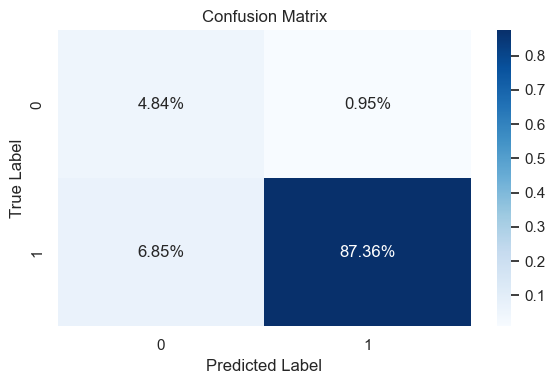


******************************
ROC Curve
******************************


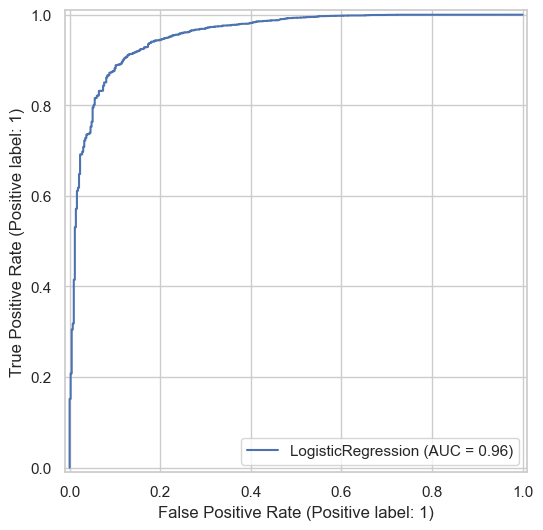


Logistic Regression completed in 0.35 seconds.


In [63]:
from sklearn.linear_model import LogisticRegression
import time

# ===============================
# 1. Initialize and Time the Model Build
# ===============================
print("Training and evaluating Logistic Regression...\n")

# Optionally track training time
start_time = time.time()

# Instantiate the Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', random_state=42)

# Wrap it with the ModelBuilder class
lr_model_builder = ModelBuilder(logreg_model, X_train, X_test, y_train, y_test)

# ===============================
# 2. Train the Model and Predict
# ===============================
# Train the model and get predictions on the test set
y_pred_class = lr_model_builder.train_model()

# ===============================
# 3. Evaluate the Model
# ===============================
# Evaluate performance (prints metrics, plots ROC and confusion matrix)
lr_metrics = lr_model_builder.evaluate_model(y_pred_class)

# ===============================
# 4. Print Elapsed Time (Optional)
# ===============================
end_time = time.time()
print(f"\nLogistic Regression completed in {end_time - start_time:.2f} seconds.")


### Hypertuning of Logistic Regression Model

Fitting 3 folds for each of 8 candidates, totalling 24 fits

✅ Best Logistic Regression Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
✅ Best Mean ROC-AUC Score from CV: 0.9830

******************************
Evaluation Metrics
******************************
Accuracy     : 92.3%
Precision    : 98.7%
Recall       : 93.0%
F1 Score     : 95.8%
ROC AUC Score: 95.1%

******************************
Classification Report
******************************
              precision    recall  f1-score   support

           0       0.41      0.80      0.54       433
           1       0.99      0.93      0.96      7051

    accuracy                           0.92      7484
   macro avg       0.70      0.87      0.75      7484
weighted avg       0.95      0.92      0.93      7484


******************************
Confusion Matrix
******************************


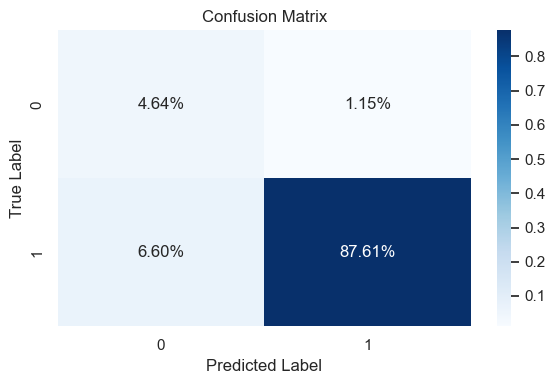


******************************
ROC Curve
******************************


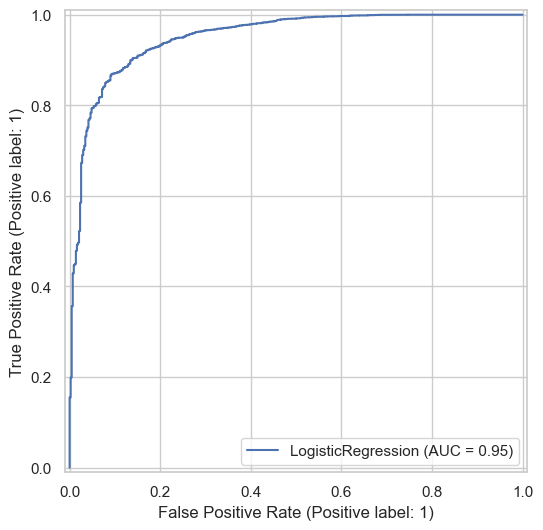

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# ================================
# 1. Define Parameter Grid
# ================================
# C: Regularization strength (inverse of regularization)
# penalty: Regularization type (L2 for Logistic Regression)
# solver: Optimization algorithm compatible with L2
logreg_param_grid = {
    'C': [0.01, 0.1, 1.0, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']  # Both support L2
}

# ================================
# 2. Set Up Grid Search
# ================================
# GridSearchCV searches over the param grid using 3-fold cross-validation
# scoring='roc_auc' ensures model is optimized for ROC-AUC metric
# n_jobs=-1 uses all processors for faster search
logreg_grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=logreg_param_grid,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    cv=3
)

# ================================
# 3. Fit Grid Search on Training Data
# ================================
logreg_grid.fit(X_train, y_train)

# Extract the best estimator from grid search
best_logreg_model = logreg_grid.best_estimator_

# Show best parameters and ROC AUC
print("\n✅ Best Logistic Regression Parameters:", logreg_grid.best_params_)
print(f"✅ Best Mean ROC-AUC Score from CV: {logreg_grid.best_score_:.4f}")

# ================================
# 4. Train & Evaluate the Best Model
# ================================
# Use our ModelBuilder class for full evaluation
lr_tuned_builder = ModelBuilder(best_logreg_model, X_train, X_test, y_train, y_test)

# Train and predict
y_pred_lr_tuned = lr_tuned_builder.train_model()

# Evaluate metrics and show ROC, confusion matrix
lr_tuned_metrics = lr_tuned_builder.evaluate_model(y_pred_lr_tuned)


### Naive Bayes Model


******************************
Evaluation Metrics
******************************
Accuracy     : 89.2%
Precision    : 98.9%
Recall       : 89.5%
F1 Score     : 94.0%
ROC AUC Score: 94.5%

******************************
Classification Report
******************************
              precision    recall  f1-score   support

           0       0.33      0.85      0.48       433
           1       0.99      0.89      0.94      7051

    accuracy                           0.89      7484
   macro avg       0.66      0.87      0.71      7484
weighted avg       0.95      0.89      0.91      7484


******************************
Confusion Matrix
******************************


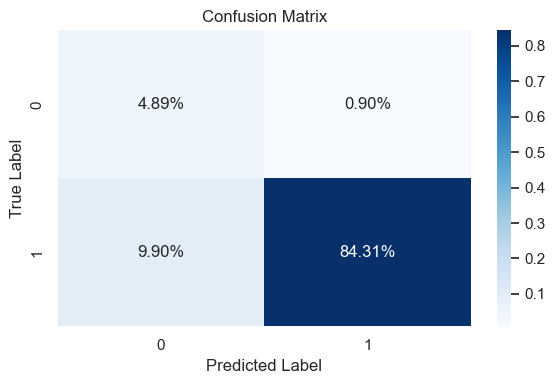


******************************
ROC Curve
******************************


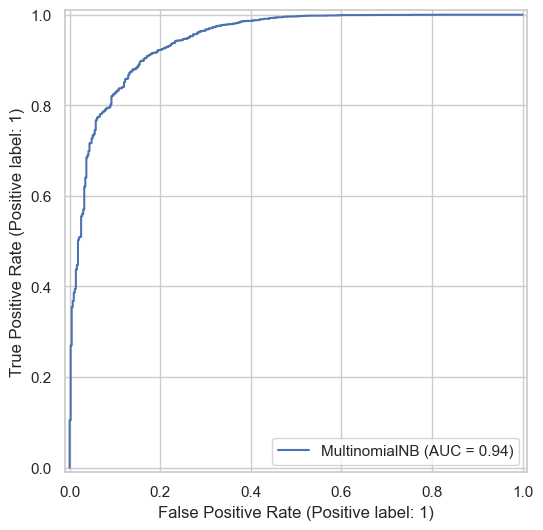

In [65]:
from sklearn.naive_bayes import MultinomialNB

# ============================================
# 1. Initialize the Multinomial Naive Bayes Model
# ============================================
# MultinomialNB is suitable for text data with term frequency (TF or TF-IDF) features
# alpha=1.0: default Laplace smoothing to handle zero-frequency problems
nb_model = MultinomialNB(alpha=1.0)

# Wrap the model using the ModelBuilder class
nb_model_builder = ModelBuilder(nb_model, X_train, X_test, y_train, y_test)

# ============================================
# 2. Train the Model and Make Predictions
# ============================================
# Train on training set and predict labels on test set
y_pred_nb = nb_model_builder.train_model()

# ============================================
# 3. Evaluate the Model Performance
# ============================================
# Evaluate accuracy, precision, recall, F1 score, ROC AUC, confusion matrix, and classification report
nb_metrics = nb_model_builder.evaluate_model(y_pred_nb)

### Random Forrest Model

Fitting 4 folds for each of 64 candidates, totalling 256 fits

✅ Grid Search completed in 56.22 seconds
✅ Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 100}

******************************
Evaluation Metrics
******************************
Accuracy     : 92.7%
Precision    : 98.2%
Recall       : 93.9%
F1 Score     : 96.0%
ROC AUC Score: 93.6%

******************************
Classification Report
******************************
              precision    recall  f1-score   support

           0       0.42      0.73      0.53       433
           1       0.98      0.94      0.96      7051

    accuracy                           0.93      7484
   macro avg       0.70      0.83      0.75      7484
weighted avg       0.95      0.93      0.94      7484


******************************
Confusion Matrix
******************************


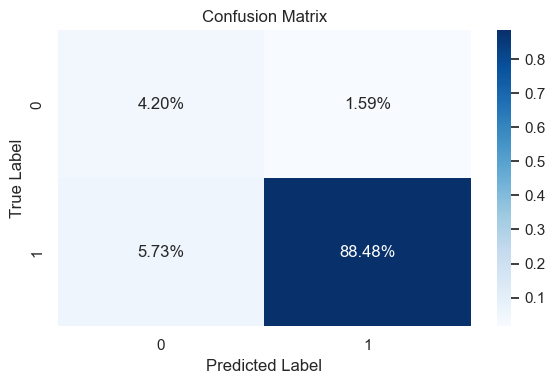


******************************
ROC Curve
******************************


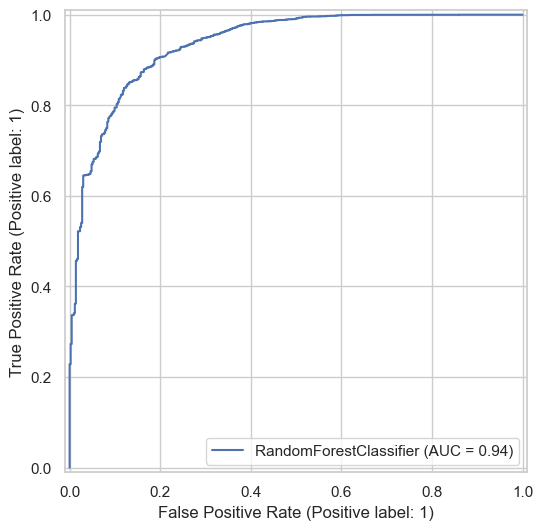

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# ============================================
# 1. Initialize Base Random Forest Model
# ============================================
# oob_score=True: enables out-of-bag scoring for validation (only on training set)
# criterion='gini': split quality metric (can also try 'entropy')
# random_state=42: ensures reproducibility
rf_model = RandomForestClassifier(
    oob_score=True,
    random_state=42,
    criterion="gini"
)

# ============================================
# 2. Define Hyperparameter Grid
# ============================================
# max_depth: max depth of trees (controls overfitting)
# min_samples_leaf: min number of samples in a leaf node (controls complexity)
# n_estimators: number of trees in the forest
rf_param_grid = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_leaf': [5, 10, 20, 50],
    'n_estimators': [10, 25, 50, 100]
}

# ============================================
# 3. Grid Search for Best Parameters
# ============================================
# scoring='f1': optimizes model based on F1-score
# cv=4: 4-fold cross-validation
# n_jobs=-1: use all available processors
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=4,
    n_jobs=-1,
    verbose=1,
    scoring="f1"
)

# Optionally track training time
start_time = time.time()

# Fit model with grid search
rf_grid_search.fit(X_train, y_train)

end_time = time.time()
print(f"\n✅ Grid Search completed in {end_time - start_time:.2f} seconds")

# ============================================
# 4. Get Best Model and Parameters
# ============================================
rf_best_model = rf_grid_search.best_estimator_
print("✅ Best Random Forest Parameters:", rf_grid_search.best_params_)

# ============================================
# 5. Train & Evaluate Best Model
# ============================================
rf_model_builder = ModelBuilder(rf_best_model, X_train, X_test, y_train, y_test)

# Train and predict
y_pred_rf = rf_model_builder.train_model()

# Evaluate model (accuracy, precision, recall, F1, ROC, etc.)
rf_metrics = rf_model_builder.evaluate_model(y_pred_rf)


### XGBoost Classifier Model


******************************
Evaluation Metrics
******************************
Accuracy     : 95.3%
Precision    : 98.2%
Recall       : 96.8%
F1 Score     : 97.5%
ROC AUC Score: 95.2%

******************************
Classification Report
******************************
              precision    recall  f1-score   support

           0       0.58      0.72      0.64       433
           1       0.98      0.97      0.97      7051

    accuracy                           0.95      7484
   macro avg       0.78      0.84      0.81      7484
weighted avg       0.96      0.95      0.96      7484


******************************
Confusion Matrix
******************************


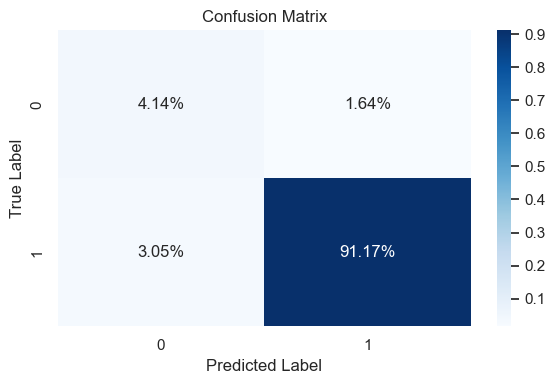


******************************
ROC Curve
******************************


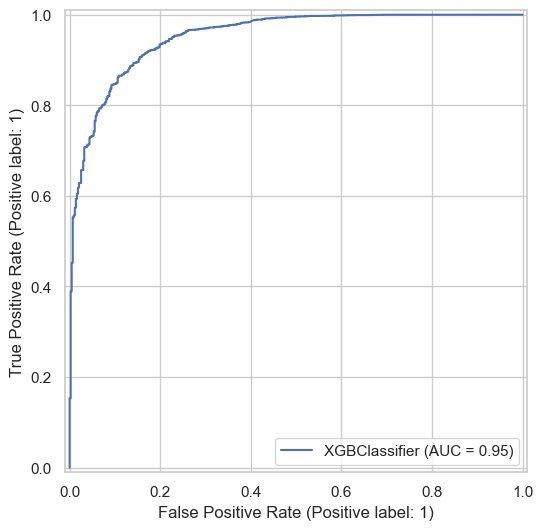

In [67]:
import xgboost as xgb

# ================================================
# 1. Initialize the XGBoost Classifier
# ================================================
# learning_rate: step size shrinkage (controls overfitting vs convergence speed)
# max_depth: maximum depth of each tree (higher = more complex model)
# random_state: ensures reproducibility
xgb_model = xgb.XGBClassifier(
    learning_rate=0.15,
    max_depth=10,
    random_state=42,
    use_label_encoder=False,         # disable warning from older versions
    eval_metric='logloss'           # required to avoid warnings in newer XGBoost versions
)

# ================================================
# 2. Use ModelBuilder to Wrap and Evaluate Model
# ================================================
xgb_model_builder = ModelBuilder(xgb_model, X_train, X_test, y_train, y_test)

# Train the model and get predictions on test data
y_pred_xgb = xgb_model_builder.train_model()

# Evaluate performance (prints metrics, confusion matrix, ROC curve, etc.)
xgb_metrics = xgb_model_builder.evaluate_model(y_pred_xgb)


### Xgboost Hypertuning 

Fitting 3 folds for each of 10 candidates, totalling 30 fits

✅ Best XGBoost Parameters: {'learning_rate': np.float64(0.15979909127171077), 'max_depth': 7, 'n_estimators': 70}
✅ Best Mean ROC AUC Score: 0.9909

******************************
Evaluation Metrics
******************************
Accuracy     : 94.0%
Precision    : 98.2%
Recall       : 95.3%
F1 Score     : 96.8%
ROC AUC Score: 94.9%

******************************
Classification Report
******************************
              precision    recall  f1-score   support

           0       0.49      0.72      0.58       433
           1       0.98      0.95      0.97      7051

    accuracy                           0.94      7484
   macro avg       0.73      0.84      0.77      7484
weighted avg       0.95      0.94      0.95      7484


******************************
Confusion Matrix
******************************


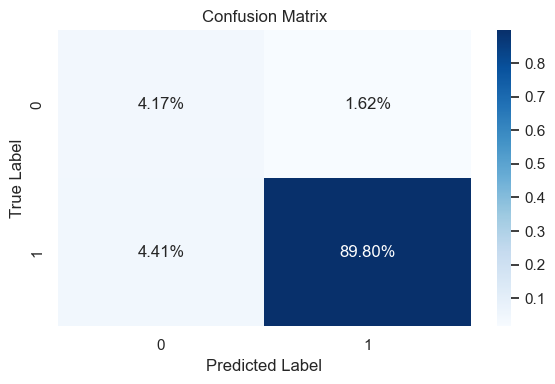


******************************
ROC Curve
******************************


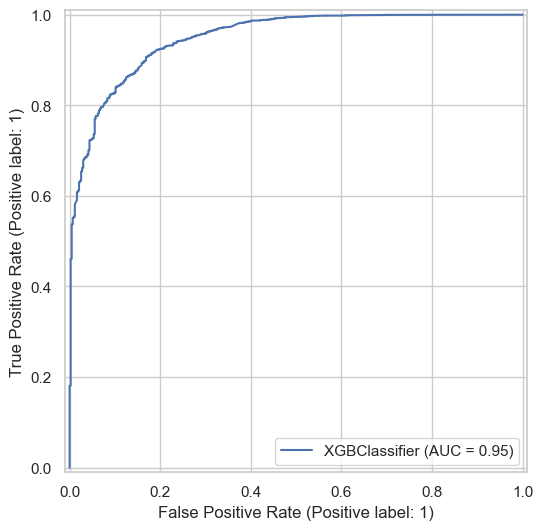

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import xgboost as xgb

# ============================================
# 1. Initialize Base XGBoost Classifier
# ============================================
# random_state ensures reproducibility
xgb_base_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'  # avoid warning for newer versions of xgboost
)

# ============================================
# 2. Define Parameter Distribution for Tuning
# ============================================
# Random search will sample from these distributions
param_dist = {
    'learning_rate': uniform(0.05, 0.15),   # Uniformly between 0.05 to 0.2
    'max_depth': randint(3, 8),             # Integers from 3 to 7
    'n_estimators': randint(50, 150)        # Integers from 50 to 149
}

# ============================================
# 3. Set Up Randomized Search
# ============================================
# n_iter=10: try 10 different parameter combinations
# scoring='roc_auc': optimize for ROC AUC
# n_jobs=-1: use all cores
# cv=3: 3-fold cross-validation
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_base_model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='roc_auc',
    n_jobs=-1,
    cv=3,
    verbose=1,
    random_state=42
)

# ============================================
# 4. Fit Model on Training Data
# ============================================
xgb_random_search.fit(X_train, y_train)

# Retrieve the best estimator from the random search
best_xgb_model = xgb_random_search.best_estimator_

# Print best parameters and best ROC AUC score from CV
print("\n✅ Best XGBoost Parameters:", xgb_random_search.best_params_)
print(f"✅ Best Mean ROC AUC Score: {xgb_random_search.best_score_:.4f}")

# ============================================
# 5. Train & Evaluate Using ModelBuilder
# ============================================
xgb_tuned_builder = ModelBuilder(best_xgb_model, X_train, X_test, y_train, y_test)

# Train and predict
y_pred_xgb_tuned = xgb_tuned_builder.train_model()

# Evaluate performance
xgb_tuned_metrics = xgb_tuned_builder.evaluate_model(y_pred_xgb_tuned)


### Model Selection Analysis

In [69]:
# ==============================================
# 1. Create a Dictionary to Store All Model Metrics
# ==============================================
# Each key represents a column: Metric types and individual model names.
# Each value is a list of scores in the order: Accuracy, Precision, Recall, F1 Score, AUC
metrics_table = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'],
    
    # All values are from earlier evaluation results of respective models
    'Logistic Regression': lr_metrics,
    'Logistic Regression (Tuned)': lr_tuned_metrics,
    'Naive Bayes': nb_metrics,
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics,
    'XGBoost (Tuned)': xgb_tuned_metrics
}

# ==============================================
# 2. Convert Dictionary to a DataFrame
# ==============================================
df_metrics = pd.DataFrame(metrics_table)

# ==============================================
# 3. Display the Metrics Comparison Table
# ==============================================
df_metrics


,Metric,Logistic Regression,Logistic Regression (Tuned),Naive Bayes,Random Forest,XGBoost,XGBoost (Tuned)
0,Accuracy,0.92,0.92,0.89,0.93,0.95,0.94
1,Precision,0.99,0.99,0.99,0.98,0.98,0.98
2,Recall,0.93,0.93,0.89,0.94,0.97,0.95
3,F1 Score,0.96,0.96,0.94,0.96,0.97,0.97
4,ROC AUC Score,0.96,0.95,0.94,0.94,0.95,0.95


<Figure size 1600x800 with 0 Axes>

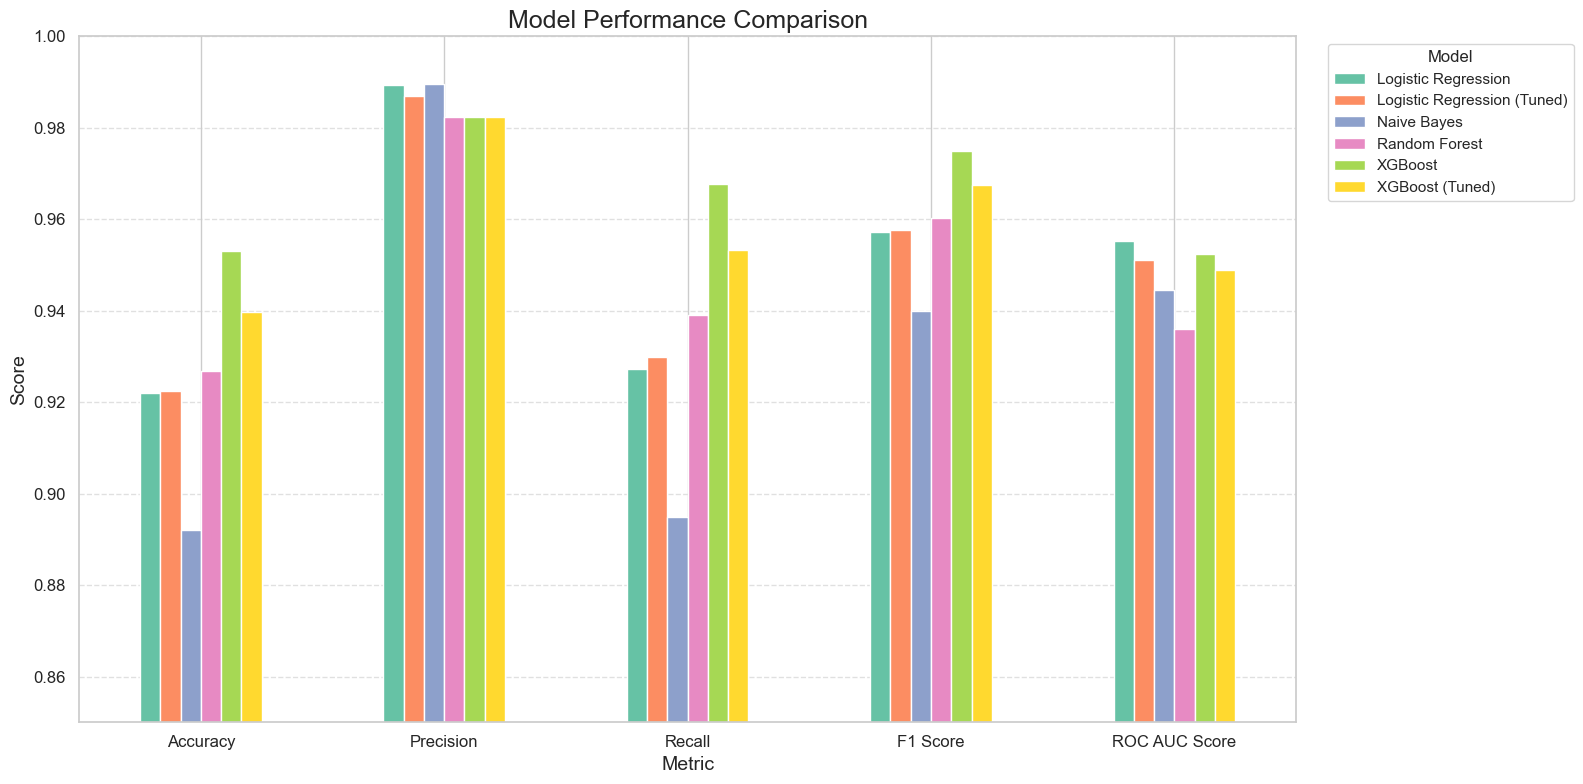

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================
# 1. Set 'Metric' Column as Index
# ============================================
df_metrics.set_index('Metric', inplace=True)

# ============================================
# 2. Define a Visually Appealing Color Palette
# ============================================
# Use a seaborn color palette with soft, distinct colors
color_palette = sns.color_palette("Set2", n_colors=len(df_metrics.columns))

# ============================================
# 3. Plot the Bar Chart with Custom Colors
# ============================================
plt.figure(figsize=(16, 8))
ax = df_metrics.plot(
    kind='bar',
    color=color_palette,
    figsize=(16, 8),
    fontsize=12
)

# ============================================
# 4. Customize Titles and Axes
# ============================================
plt.title('Model Performance Comparison', fontsize=18)
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0.85, 1.00)

# ============================================
# 5. Improve Grid and Labels
# ============================================
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Legend styling and repositioning
plt.legend(
    title='Model',
    fontsize=11,
    title_fontsize=12,
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

# ============================================
# 6. Final Layout Adjustments and Display
# ============================================
plt.tight_layout()
plt.show()


With the highest scores in accuracy, recall, and F1-score, XGBoost emerges as the top-performing model.

### Export Model

In [71]:
import os
import pickle

# ============================================
# Function to Save an Object as a Pickle File
# ============================================
def save_object(obj, filename, folder="pickle"):
    """
    Saves a Python object to a .pkl file in the specified folder.

    Parameters:
        obj (any): The Python object to save (e.g., model, vectorizer, DataFrame).
        filename (str): The name of the file (without extension).
        folder (str): Folder where the file should be saved. Defaults to 'pickle'.
    """
    # Create the folder if it doesn't exist
    os.makedirs(folder, exist_ok=True)
    
    # Construct full file path with .pkl extension
    full_path = os.path.join(folder, f"{filename}.pkl")
    
    try:
        # Write the object to disk
        with open(full_path, 'wb') as f:
            pickle.dump(obj, f)
        print(f"✅ Saved: {filename}.pkl in '{folder}/'")
    except Exception as e:
        print(f"❌ Failed to save {filename}.pkl: {e}")

# ============================================
# Save Model, Vectorizer, and Cleaned Data
# ============================================
save_object(xgb_model, 'sentiment-classification-xgboost-model')
save_object(tfidf_vectorizer, 'tfidf-vectorizer')
save_object(df_clean, 'cleaned-review-data')


✅ Saved: sentiment-classification-xgboost-model.pkl in 'pickle/'
✅ Saved: tfidf-vectorizer.pkl in 'pickle/'
✅ Saved: cleaned-review-data.pkl in 'pickle/'


### Recommendation System

There are various approaches to building recommendation systems, with the two broad categories being Content-Based Filtering and Collaborative Filtering. In this project, we will focus on two types of Collaborative Filtering techniques:

<b>User-Based Collaborative Filtering (UBCF)</b>

<b>Item-Based Collaborative Filtering (IBCF)</b>

Both methods will be implemented and evaluated to determine the more effective model. Once the optimal recommendation system is identified, it will be used to generate a list of 20 products that a user is most likely to purchase, based on their rating history.

In [72]:
# ============================================
# 1. Dataset Overview
# ============================================
# Check data types, non-null counts, and memory usage
df_reviews.info()


<class 'pandas.core.frame.DataFrame'>
Index: 29936 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29936 non-null  object
 1   brand                29936 non-null  object
 2   categories           29936 non-null  object
 3   manufacturer         29795 non-null  object
 4   name                 29936 non-null  object
 5   reviews_date         29896 non-null  object
 6   reviews_didPurchase  15931 non-null  object
 7   reviews_doRecommend  27395 non-null  object
 8   reviews_rating       29936 non-null  int64 
 9   reviews_text         29936 non-null  object
 10  reviews_title        29936 non-null  object
 11  reviews_username     29936 non-null  object
 12  user_sentiment       29936 non-null  int64 
 13  review_length        29936 non-null  int64 
 14  sentiment_label      29936 non-null  object
 15  reviews_full_text    29936 non-null  object
dtypes: int64(

In [73]:
# ============================================
# 2. Select Relevant Columns for Recommendation Engine
# ============================================
# Keeping only the necessary columns: user ID, product ID, product rating, and user name
df_recommendation = df_reviews[["id", "name", "reviews_rating", "reviews_username"]].copy()


In [74]:
# ============================================
# 3. Split Data into Training and Testing Sets
# ============================================
from sklearn.model_selection import train_test_split

train, test = train_test_split(
    df_recommendation,
    test_size=0.25,    # 25% of data as test
    random_state=42    # Ensures reproducibility
)


In [75]:
# Print shape of train and test sets
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")


Train shape: (22452, 4)
Test shape: (7484, 4)


In [76]:
# ============================================
# 4. Define Column Names for Clarity
# ============================================
product_column = "id"                 # Product ID
user_column = "reviews_username"     # User identifier
value_column = "reviews_rating"      # Rating given by user

In [77]:
# ============================================
# 5. Create User-Item Interaction Matrix (Pivot Table)
# ============================================
# Rows = users, Columns = products, Values = ratings
# Fill missing ratings with 0 (i.e., no interaction)
df_pivot = pd.pivot_table(
    train,
    index=user_column,
    columns=product_column,
    values=value_column,
    fill_value=0
)

In [78]:
# Display top 10 rows of the pivot matrix
df_pivot.head(10)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-MCY1cnluZ0-bCv_,AVpe-PJnLJeJML43ziaj,AVpe-YAL1cnluZ0-bHGh,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe3_ikilAPnD_xPykq,AVpe4-GPLJeJML43xmuY,AVpe41TqilAPnD_xQH3d,AVpe4Bq81cnluZ0-YwTN,AVpe4hlXLJeJML43xbrB,AVpe4pnBilAPnD_xQDeb,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5Mv4ilAPnD_xQQyy,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe5tC61cnluZ0-ZZ86,AVpe5ttZLJeJML43x4yO,AVpe625_ilAPnD_xQ4SP,AVpe6C3WLJeJML43yApY,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6_VI1cnluZ0-Z4do,AVpe6n2_LJeJML43yOgE,AVpe71Vk1cnluZ0-aL_Z,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7JTHilAPnD_xQ_Cl,AVpe7jB8LJeJML43yj91,AVpe7sl91cnluZ0-aI1Y,AVpe7tA31cnluZ0-aI-r,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8q4T1cnluZ0-afct,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe9vHs1cnluZ0-a4TU,AVpe_5U_ilAPnD_xSrxG,AVpe_N91LJeJML43z4jD,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf-GsfLJeJML43GxG4,AVpf-bS61cnluZ0-uZcq,AVpf-k78LJeJML43G4qN,AVpf-lMV1cnluZ0-ub0_,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0kZFilAPnD_xi5QZ,AVpf0pfrilAPnD_xi6s_,AVpf0thK1cnluZ0-r8vR,AVpf1pwXLJeJML43EqpT,AVpf1ryk1cnluZ0-sONd,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5CnILJeJML43FjaU,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5ZcH1cnluZ0-tL9V,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,...,AVpfKa3uilAPnD_xWSGx,AVpfKb8k1cnluZ0-fQdA,AVpfKhuv1cnluZ0-fSVr,AVpfL-z9ilAPnD_xWzE_,AVpfLnfPLJeJML434HpK,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNVsj1cnluZ0-gNQN,AVpfNWbPilAPnD_xXPR7,AVpfNc9cLJeJML434tza,AVpfNfEMLJeJML434uf-,AVpfNglu1cnluZ0-gQ7x,AVpfO5u71cnluZ0-guiN,AVpfOIrkilAPnD_xXgDG,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfOrD0ilAPnD_xXrRj,AVpfP-rELJeJML435jEN,AVpfPKzxLJeJML435SYL,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPjqKLJeJML435aZR,AVpfPkrkilAPnD_xX-L9,AVpfPnrU1cnluZ0-g9rL,AVpfPx6V1cnluZ0-hA5y,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRE4tilAPnD_xYdo_,AVpfRM8dLJeJML4358wT,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRkzN1cnluZ0-hmnu,AVpfRoqcLJeJML436FqG,AVpfSFDo1cnluZ0-hwjT,AVpfSvmGilAPnD_xY_gE,AVpfTVkcilAPnD_xZLts,AVpfUCiPilAPnD_xZai4,AVpfUJu_ilAPnD_xZdDr,AVpfUN2nilAPnD_xZeY3,AVpfUQZjilAPnD_xZfOU,AVpfVMhR1cnluZ0-ixY8,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpf_rYe1cnluZ0-ut8Y,AVpfa1joLJeJML4385hb,AVpfazX31cnluZ0-kbdl,AVpfbjraLJeJML439F91,AVpfbkyr1cnluZ0-kozI,AVpfbpzd1cnluZ0-kqJV,AVpfbraG1cnluZ0-kqnn,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfddjcLJeJML439loo,AVpfe3On1cnluZ0-lgn5,AVpfewoLilAPnD_xcfgU,AVpfgvkJLJeJML43-g1y,AVpfh1gsilAPnD_xdX_S,AVpfhpNkilAPnD_xdUZz,AVpfhxaELJeJML43-zsM,AVpfi79RLJeJML43_Jo0,AVpfiRY_LJeJML43-8p9,AVpfiUrfLJeJML43-9nY,AVpfifml1cnluZ0-mjSb,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfk4y7ilAPnD_xeTgd,AVpfkIiYilAPnD_xeEjr,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfksililAPnD_xePx_,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVp

### Creating dummy train and test

In [79]:
# ============================================
# 1. Copy Training Data to Avoid Altering Original
# ============================================
# Make a deep copy of the training set to create a binary matrix
dummy_train = train.copy()

In [80]:
# Display the first few rows
dummy_train.head()

,id,name,reviews_rating,reviews_username
27954,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),5,silvahalo
3375,AVpe5s3RLJeJML43x4eA,Pantene Pro-V Expert Collection Age Defy Conditioner,4,stacberg
20192,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,erwerw
457,AV1l8zRZvKc47QAVhnAv,Olay Regenerist Deep Hydration Regenerating Cream,5,olay53
19060,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,nicelady


In [81]:
# ============================================
# 2. Convert Ratings to Binary Format
# ============================================
# If the product was rated (i.e., rating >= 1), mark as 0 → already seen
# If not rated (i.e., rating < 1 or missing), mark as 1 → candidate for prediction
dummy_train[value_column] = dummy_train[value_column].apply(lambda x: 0 if x >= 1 else 1)

In [82]:
# ============================================
# 3. Pivot to Create User-Item Dummy Matrix
# ============================================
# Rows: users, Columns: products, Values: 1 (not rated), 0 (already rated)
# Fill missing values (user-product pairs that don't exist) with 1 → potential predictions
dummy_train = pd.pivot_table(
    dummy_train,
    index=user_column,
    columns=product_column,
    values=value_column,
    fill_value=1
)


In [83]:
# Display top 10 rows of the dummy matrix
dummy_train.head(10)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-MCY1cnluZ0-bCv_,AVpe-PJnLJeJML43ziaj,AVpe-YAL1cnluZ0-bHGh,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe3_ikilAPnD_xPykq,AVpe4-GPLJeJML43xmuY,AVpe41TqilAPnD_xQH3d,AVpe4Bq81cnluZ0-YwTN,AVpe4hlXLJeJML43xbrB,AVpe4pnBilAPnD_xQDeb,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5Mv4ilAPnD_xQQyy,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe5tC61cnluZ0-ZZ86,AVpe5ttZLJeJML43x4yO,AVpe625_ilAPnD_xQ4SP,AVpe6C3WLJeJML43yApY,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6_VI1cnluZ0-Z4do,AVpe6n2_LJeJML43yOgE,AVpe71Vk1cnluZ0-aL_Z,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7JTHilAPnD_xQ_Cl,AVpe7jB8LJeJML43yj91,AVpe7sl91cnluZ0-aI1Y,AVpe7tA31cnluZ0-aI-r,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8q4T1cnluZ0-afct,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe9vHs1cnluZ0-a4TU,AVpe_5U_ilAPnD_xSrxG,AVpe_N91LJeJML43z4jD,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf-GsfLJeJML43GxG4,AVpf-bS61cnluZ0-uZcq,AVpf-k78LJeJML43G4qN,AVpf-lMV1cnluZ0-ub0_,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0kZFilAPnD_xi5QZ,AVpf0pfrilAPnD_xi6s_,AVpf0thK1cnluZ0-r8vR,AVpf1pwXLJeJML43EqpT,AVpf1ryk1cnluZ0-sONd,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5CnILJeJML43FjaU,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5ZcH1cnluZ0-tL9V,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,...,AVpfKa3uilAPnD_xWSGx,AVpfKb8k1cnluZ0-fQdA,AVpfKhuv1cnluZ0-fSVr,AVpfL-z9ilAPnD_xWzE_,AVpfLnfPLJeJML434HpK,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNVsj1cnluZ0-gNQN,AVpfNWbPilAPnD_xXPR7,AVpfNc9cLJeJML434tza,AVpfNfEMLJeJML434uf-,AVpfNglu1cnluZ0-gQ7x,AVpfO5u71cnluZ0-guiN,AVpfOIrkilAPnD_xXgDG,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfOrD0ilAPnD_xXrRj,AVpfP-rELJeJML435jEN,AVpfPKzxLJeJML435SYL,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPjqKLJeJML435aZR,AVpfPkrkilAPnD_xX-L9,AVpfPnrU1cnluZ0-g9rL,AVpfPx6V1cnluZ0-hA5y,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRE4tilAPnD_xYdo_,AVpfRM8dLJeJML4358wT,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRkzN1cnluZ0-hmnu,AVpfRoqcLJeJML436FqG,AVpfSFDo1cnluZ0-hwjT,AVpfSvmGilAPnD_xY_gE,AVpfTVkcilAPnD_xZLts,AVpfUCiPilAPnD_xZai4,AVpfUJu_ilAPnD_xZdDr,AVpfUN2nilAPnD_xZeY3,AVpfUQZjilAPnD_xZfOU,AVpfVMhR1cnluZ0-ixY8,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpf_rYe1cnluZ0-ut8Y,AVpfa1joLJeJML4385hb,AVpfazX31cnluZ0-kbdl,AVpfbjraLJeJML439F91,AVpfbkyr1cnluZ0-kozI,AVpfbpzd1cnluZ0-kqJV,AVpfbraG1cnluZ0-kqnn,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfddjcLJeJML439loo,AVpfe3On1cnluZ0-lgn5,AVpfewoLilAPnD_xcfgU,AVpfgvkJLJeJML43-g1y,AVpfh1gsilAPnD_xdX_S,AVpfhpNkilAPnD_xdUZz,AVpfhxaELJeJML43-zsM,AVpfi79RLJeJML43_Jo0,AVpfiRY_LJeJML43-8p9,AVpfiUrfLJeJML43-9nY,AVpfifml1cnluZ0-mjSb,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfk4y7ilAPnD_xeTgd,AVpfkIiYilAPnD_xeEjr,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfksililAPnD_xePx_,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVp

### Similarity Matrix of the Users


In [84]:
# ============================================
# 1. Check Number of Unique Users
# ============================================
# Confirm that index of pivot table corresponds to unique users
print("Number of unique users in the pivot table:", df_pivot.index.nunique())

Number of unique users in the pivot table: 19427


In [85]:
# ============================================
# 2. Import Required Functions
# ============================================
from sklearn.metrics.pairwise import cosine_similarity


In [86]:
# ============================================
# 3. Compute Cosine Similarity Between Users
# ============================================
# Cosine similarity gives a value between 0 and 1 based on vector direction
# Rows: users, Columns: users
user_correlation = cosine_similarity(df_pivot)

In [87]:
# ============================================
# 4. Handle Missing Values if Any (Safety Step)
# ============================================
# If any NaNs were introduced during similarity computation, convert them to 0
user_correlation[np.isnan(user_correlation)] = 0

In [88]:
# ============================================
# 5. Display Results
# ============================================
print("User-User Correlation Matrix:\n", user_correlation)
print("Shape of the correlation matrix:", user_correlation.shape)

User-User Correlation Matrix:
 [[1.        0.        0.        ... 0.        0.9486833 0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.9486833 0.        0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]
Shape of the correlation matrix: (19427, 19427)


### User-User Prediction

In [89]:
# ============================================
# 1. Remove Negative Correlations (Not Useful for Recommendations)
# ============================================
# Set all negative similarity scores to 0 to avoid using dissimilar users
user_correlation[user_correlation < 0] = 0

In [90]:
# ============================================
# 2. Predict User-Product Ratings
# ============================================
# Multiply the user similarity matrix with the original user-item matrix
# Result: estimated ratings based on similar users
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))

In [91]:
# ============================================
# 3. Filter Predictions Using Dummy Matrix
# ============================================
# Only keep predictions for products the user hasn't rated
# Multiply element-wise with dummy_train: 1 → not rated, 0 → already rated
user_final_rating = np.multiply(user_predicted_ratings, dummy_train)

In [92]:
# ============================================
# 4. Display Final User-Product Recommendation Scores
# ============================================
# These are the predicted scores only for unrated products (others are 0)
user_final_rating = pd.DataFrame(user_final_rating, index=df_pivot.index, columns=df_pivot.columns)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-MCY1cnluZ0-bCv_,AVpe-PJnLJeJML43ziaj,AVpe-YAL1cnluZ0-bHGh,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe3_ikilAPnD_xPykq,AVpe4-GPLJeJML43xmuY,AVpe41TqilAPnD_xQH3d,AVpe4Bq81cnluZ0-YwTN,AVpe4hlXLJeJML43xbrB,AVpe4pnBilAPnD_xQDeb,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5Mv4ilAPnD_xQQyy,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe5tC61cnluZ0-ZZ86,AVpe5ttZLJeJML43x4yO,AVpe625_ilAPnD_xQ4SP,AVpe6C3WLJeJML43yApY,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6_VI1cnluZ0-Z4do,AVpe6n2_LJeJML43yOgE,AVpe71Vk1cnluZ0-aL_Z,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7JTHilAPnD_xQ_Cl,AVpe7jB8LJeJML43yj91,AVpe7sl91cnluZ0-aI1Y,AVpe7tA31cnluZ0-aI-r,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8q4T1cnluZ0-afct,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe9vHs1cnluZ0-a4TU,AVpe_5U_ilAPnD_xSrxG,AVpe_N91LJeJML43z4jD,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf-GsfLJeJML43GxG4,AVpf-bS61cnluZ0-uZcq,AVpf-k78LJeJML43G4qN,AVpf-lMV1cnluZ0-ub0_,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0kZFilAPnD_xi5QZ,AVpf0pfrilAPnD_xi6s_,AVpf0thK1cnluZ0-r8vR,AVpf1pwXLJeJML43EqpT,AVpf1ryk1cnluZ0-sONd,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5CnILJeJML43FjaU,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5ZcH1cnluZ0-tL9V,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,...,AVpfKa3uilAPnD_xWSGx,AVpfKb8k1cnluZ0-fQdA,AVpfKhuv1cnluZ0-fSVr,AVpfL-z9ilAPnD_xWzE_,AVpfLnfPLJeJML434HpK,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNVsj1cnluZ0-gNQN,AVpfNWbPilAPnD_xXPR7,AVpfNc9cLJeJML434tza,AVpfNfEMLJeJML434uf-,AVpfNglu1cnluZ0-gQ7x,AVpfO5u71cnluZ0-guiN,AVpfOIrkilAPnD_xXgDG,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfOrD0ilAPnD_xXrRj,AVpfP-rELJeJML435jEN,AVpfPKzxLJeJML435SYL,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPjqKLJeJML435aZR,AVpfPkrkilAPnD_xX-L9,AVpfPnrU1cnluZ0-g9rL,AVpfPx6V1cnluZ0-hA5y,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRE4tilAPnD_xYdo_,AVpfRM8dLJeJML4358wT,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRkzN1cnluZ0-hmnu,AVpfRoqcLJeJML436FqG,AVpfSFDo1cnluZ0-hwjT,AVpfSvmGilAPnD_xY_gE,AVpfTVkcilAPnD_xZLts,AVpfUCiPilAPnD_xZai4,AVpfUJu_ilAPnD_xZdDr,AVpfUN2nilAPnD_xZeY3,AVpfUQZjilAPnD_xZfOU,AVpfVMhR1cnluZ0-ixY8,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpf_rYe1cnluZ0-ut8Y,AVpfa1joLJeJML4385hb,AVpfazX31cnluZ0-kbdl,AVpfbjraLJeJML439F91,AVpfbkyr1cnluZ0-kozI,AVpfbpzd1cnluZ0-kqJV,AVpfbraG1cnluZ0-kqnn,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfddjcLJeJML439loo,AVpfe3On1cnluZ0-lgn5,AVpfewoLilAPnD_xcfgU,AVpfgvkJLJeJML43-g1y,AVpfh1gsilAPnD_xdX_S,AVpfhpNkilAPnD_xdUZz,AVpfhxaELJeJML43-zsM,AVpfi79RLJeJML43_Jo0,AVpfiRY_LJeJML43-8p9,AVpfiUrfLJeJML43-9nY,AVpfifml1cnluZ0-mjSb,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfk4y7ilAPnD_xeTgd,AVpfkIiYilAPnD_xeEjr,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfksililAPnD_xePx_,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVp

### Retrieve the top 20 recommended items for the user based on the model

In [93]:
# ============================================
# 1. Set the Target Username for Recommendation
# ============================================
user_input = "jessica"
print(f"Generating recommendations for user: {user_input}")


Generating recommendations for user: jessica


In [94]:
# ============================================
# 2. Get Top 20 Product Recommendations for the User
# ============================================
# Sort predictions in descending order and take top 20 unrated products
recommendations = user_final_rating.loc[user_input].sort_values(ascending=False).head(20)

In [95]:
# ============================================
# 3. Create a DataFrame of Recommended Product IDs and Scores
# ============================================
final_recommendations = pd.DataFrame({
    'product_id': recommendations.index,
    'similarity_score': recommendations.values
})

In [96]:
# Reset index to clean up the DataFrame
final_recommendations.reset_index(drop=True, inplace=True)

In [97]:
# ============================================
# 4. Merge with Product Details (from original training data)
# ============================================
# This fetches product names using IDs for better readability
recommendation_output = pd.merge(
    final_recommendations,
    train[['id', 'name']],  # only need product id and name
    left_on='product_id',
    right_on='id'
).drop_duplicates(subset=['id'])



In [98]:
# ============================================
# 5. Display Final Recommended Products
# ============================================
recommendation_output = recommendation_output[['id', 'name', 'similarity_score']]
recommendation_output.sort_values(by='similarity_score', ascending=False).reset_index(drop=True)

,id,name,similarity_score
0,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,93.08
1,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),56.95
2,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),44.26
3,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,38.05
4,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,26.12
5,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),24.64
6,AVpfM_ytilAPnD_xXIJb,Tostitos Bite Size Tortilla Chips,17.09
7,AVpfR5m0LJeJML436K3W,Jason Aldean - They Don't Know,10.96
8,AVpfPnrU1cnluZ0-g9rL,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),10.14
9,AVpf385g1cnluZ0-s0_t,"Hormel Chili, No Beans",9.88


### User-User Evaluation

In [99]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# ============================================
# 1. Find Common Users Between Train & Test Sets
# ============================================
# Filter test dataset to retain only users also present in training
common = test[test.reviews_username.isin(train.reviews_username)].copy()
print(f"Common users: {common.shape[0]} rows")


Common users: 1795 rows


In [100]:
# ============================================
# 2. Create User-Item Matrix from Common Data
# ============================================
# Pivot to create a user-product matrix for these common users
common_user_matrix = pd.pivot_table(
    common, index=user_column, columns=product_column, values=value_column
)
common_user_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7sl91cnluZ0-aI1Y,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8q4T1cnluZ0-afct,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe_N91LJeJML43z4jD,AVpe_dxlilAPnD_xSiHI,AVpf--o9LJeJML43G_Fq,AVpf-GsfLJeJML43GxG4,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0pfrilAPnD_xi6s_,AVpf0thK1cnluZ0-r8vR,AVpf1pwXLJeJML43EqpT,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5CnILJeJML43FjaU,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5olc1cnluZ0-tPrO,AVpf63aJLJeJML43F__Q,AVpf7I3i1cnluZ0-tnL6,AVpf7LysilAPnD_xkm9G,AVpf7aUAilAPnD_xkqbP,AVpf7fFbilAPnD_xkrmW,AVpf9pzn1cnluZ0-uNTM,AVpfAgSp1cnluZ0-b2-K,AVpfBSJgilAPnD_xTLf3,AVpfBU2S1cnluZ0-cJsO,AVpfBpnEilAPnD_xTUBx,AVpfBrUZilAPnD_xTUly,AVpfBwE4ilAPnD_xTWO1,AVpfC3KoLJeJML431KRR,AVpfCuzrilAPnD_xTroT,AVpfD9xTLJeJML431ig2,AVpfDI3xilAPnD_xTz-k,AVpfE7puilAPnD_xUcCW,AVpfEqruilAPnD_xUWDr,AVpfGRUHilAPnD_xU5nU,AVpfGuDrLJeJML432fDz,AVpfH2Rx1cnluZ0-eYtu,AVpfHf4wLJeJML432vqK,AVpfIfnYilAPnD_xVpGi,AVpfIvbgLJeJML433Kph,AVpfJP1C1cnluZ0-e3Xy,AVpfJcHuLJeJML433ZrY,AVpfKb8k1cnluZ0-fQdA,AVpfLnfPLJeJML434HpK,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNWbPilAPnD_xXPR7,AVpfNc9cLJeJML434tza,AVpfOIrkilAPnD_xXgDG,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPkrkilAPnD_xX-L9,AVpfPnrU1cnluZ0-g9rL,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRE4tilAPnD_xYdo_,AVpfRM8dLJeJML4358wT,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRoqcLJeJML436FqG,AVpfTVkcilAPnD_xZLts,AVpfUJu_ilAPnD_xZdDr,AVpfUN2nilAPnD_xZeY3,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmjXGLJeJML43AQ5_,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [101]:
# ============================================
# 3. Prepare User Correlation Matrix as DataFrame
# ============================================
# Convert user correlation matrix to DataFrame and align with pivot table index
user_correlation_df = pd.DataFrame(user_correlation, index=df_pivot.index, columns=df_pivot.index)

# Filter for common users (for both rows and columns)
common_users = common[user_column].unique().tolist()

# Subset the correlation matrix to include only common users
user_corr_filtered = user_correlation_df.loc[common_users, common_users]

# Remove negative similarities (we don't consider dissimilar users)
user_corr_filtered[user_corr_filtered < 0] = 0

In [102]:
# ============================================
# 4. Predict Ratings Using User Similarities
# ============================================
# Multiply user similarity with actual rating matrix to get predicted scores
predicted_ratings = np.dot(user_corr_filtered, common_user_matrix.fillna(0))


In [103]:
# ============================================
# 5. Create Dummy Test Matrix (Mask Rated Items)
# ============================================
# Mark rated items with 1, others 0 → for filtering during RMSE calculation
dummy_test = common.copy()
dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x >= 1 else 0)

# Pivot to user-item dummy matrix
dummy_test_matrix = pd.pivot_table(
    dummy_test, index=user_column, columns=product_column, values=value_column
).fillna(0)

In [104]:
# ============================================
# 6. Filter Predictions for Rated Items Only
# ============================================
# Keep predicted scores only for items the user rated
final_predicted = np.multiply(predicted_ratings, dummy_test_matrix)

# Convert result into a DataFrame aligned with common matrix
final_predicted_df = pd.DataFrame(final_predicted, index=common_user_matrix.index, columns=common_user_matrix.columns)


In [105]:
# ============================================
# 7. Normalize Predicted Ratings to [1, 5] Scale
# ============================================
# Remove zero (unrated) entries for scaling
X = final_predicted_df[final_predicted_df > 0].copy()

# Apply MinMax scaling to bring predictions in 1–5 rating scale
scaler = MinMaxScaler(feature_range=(1, 5))
y_scaled = scaler.fit_transform(X)

In [106]:
# ============================================
# 8. Calculate RMSE Between Actual & Predicted Ratings
# ============================================
# Actual user-item rating matrix for common users
actual_common_matrix = common_user_matrix.copy()

# Only compare on rated values
total_non_nan = np.count_nonzero(~np.isnan(y_scaled))

# Calculate Root Mean Squared Error
rmse = np.sqrt(np.nansum((actual_common_matrix - y_scaled) ** 2) / total_non_nan)
print(f"RMSE for common user predictions: {rmse:.4f}")

RMSE for common user predictions: 2.4848


### Item Based Recommendation

In [107]:
# ============================================
# 1. Create Item-User Rating Matrix
# ============================================
# Pivot the train dataset to have:
# - Rows: Products
# - Columns: Users
# - Values: Ratings
df_pivot = pd.pivot_table(
    train,
    index=product_column,     # Products as rows
    columns=user_column,      # Users as columns
    values=value_column       # Ratings as values
)

In [108]:
# View the first few rows of the item-user matrix
df_pivot.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123soccermom,123too,127726,12cass12,12gage,132457,13dani,13ram,13thfaerie,1421nikki,143st,148maine,15425shopper,170361eggs,17roses,1863philly,1943,1950rmm,1968bear,1970,1992firebirdgirl,19bubba67,19granny,1awesome1,1boomer,1buzymom,1cadet,1clean1,1cleaner,1cocoafan,1derpet1,1disappoint,1friendlycat,1glenn,1gra,1gussy,1happymom,1healthytot,1jc1,1jodie,1kindword,1nikki31t,1officegal,1olaygal,1pleasedclient,1scooby1,1shop,1sonny,1stcavdivision,1stgrade,1stlady,1sttimemama,1sungirl,1texasmom,1tomg,1wildbill2l,1witch,2011mom2b,2011pink2011,2013bestbuyer,2014bestbuys,2015mom,2016home,2016parker10,2062351337,20crafter16,21honey,232323,2455,2532674594,25happyshopper,262jennifer,2827,28green,295259,2bgreen,2busy4u,2choclabs,2cutekids,...,yrina03,yshan,ythelastman89,yttric,yucky111,yulkakapulka,yummy,yumyum,yunji,yvonne,yzkgsx,z12345,z33pisces,zabdelra,zach,zacharymcneill,zacharysaunt,zachizz,zachsmom,zacroxs,zaibo,zak08,zakkwylde29,zamanda,zanarkandruinsx2,zanay,zanzan73,zapaduh,zapman,zarah,zarrahsmommy,zaskar,zaza,zburt5,zchandyman,zebras,zee74,zeek,zegan,zelyas,zenmon,zer0zer0agent,zero,zeroonec,zetamom,zfem2,zhio,zhjwpp,zhynellebb,ziana,zibber23,zibby4,ziggy,zillafan,zillanator,zina911,zink,zinnian,zipflip,zipp,zipper,zipperdoo,zippity,zippy,zitro,zkondrk,zman69,zmikez,zmom,znxfyt,zod10,zodness,zoe1988,zoeellasca,zoey,zoeyny,zombie,zombiedad80,zombiejess,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zookeeper,zoso60,zotox,zowie,zozo0o,zpalma,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [109]:
# ============================================
# 2. Normalize Ratings by Subtracting Product Mean
# ============================================
# Compute the mean rating for each product (row-wise)
mean = np.nanmean(df_pivot, axis=1)


In [110]:
# ============================================
# 2. Normalize Ratings by Subtracting Product Mean
# ============================================
# Compute the mean rating for each product (row-wise)
mean = np.nanmean(df_pivot, axis=1)

# Subtract the product's mean rating from each user's rating for that product
# This centers the data and removes product popularity bias
df_subtracted = (df_pivot.T - mean).T

# View normalized matrix
df_subtracted.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123soccermom,123too,127726,12cass12,12gage,132457,13dani,13ram,13thfaerie,1421nikki,143st,148maine,15425shopper,170361eggs,17roses,1863philly,1943,1950rmm,1968bear,1970,1992firebirdgirl,19bubba67,19granny,1awesome1,1boomer,1buzymom,1cadet,1clean1,1cleaner,1cocoafan,1derpet1,1disappoint,1friendlycat,1glenn,1gra,1gussy,1happymom,1healthytot,1jc1,1jodie,1kindword,1nikki31t,1officegal,1olaygal,1pleasedclient,1scooby1,1shop,1sonny,1stcavdivision,1stgrade,1stlady,1sttimemama,1sungirl,1texasmom,1tomg,1wildbill2l,1witch,2011mom2b,2011pink2011,2013bestbuyer,2014bestbuys,2015mom,2016home,2016parker10,2062351337,20crafter16,21honey,232323,2455,2532674594,25happyshopper,262jennifer,2827,28green,295259,2bgreen,2busy4u,2choclabs,2cutekids,...,yrina03,yshan,ythelastman89,yttric,yucky111,yulkakapulka,yummy,yumyum,yunji,yvonne,yzkgsx,z12345,z33pisces,zabdelra,zach,zacharymcneill,zacharysaunt,zachizz,zachsmom,zacroxs,zaibo,zak08,zakkwylde29,zamanda,zanarkandruinsx2,zanay,zanzan73,zapaduh,zapman,zarah,zarrahsmommy,zaskar,zaza,zburt5,zchandyman,zebras,zee74,zeek,zegan,zelyas,zenmon,zer0zer0agent,zero,zeroonec,zetamom,zfem2,zhio,zhjwpp,zhynellebb,ziana,zibber23,zibby4,ziggy,zillafan,zillanator,zina911,zink,zinnian,zipflip,zipp,zipper,zipperdoo,zippity,zippy,zitro,zkondrk,zman69,zmikez,zmom,znxfyt,zod10,zodness,zoe1988,zoeellasca,zoey,zoeyny,zombie,zombiedad80,zombiejess,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zookeeper,zoso60,zotox,zowie,zozo0o,zpalma,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [111]:
# ============================================
# 3. Compute Item-Item Similarity Matrix using Cosine Distance
# ============================================
# Use cosine similarity to compute how similar items are based on user ratings
# Fill NaNs with 0 to avoid computation errors
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')


In [112]:
# ============================================
# 4. Clean and Finalize the Similarity Matrix
# ============================================
# Replace any NaN values with 0 (in case of division by zero during cosine computation)
item_correlation[np.isnan(item_correlation)] = 0

# Set negative similarity values to 0 (we ignore negative similarity in recommender systems)
item_correlation[item_correlation < 0] = 0

# Final item correlation matrix
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Item-Item Prediction

In [113]:
# ============================================
# Compute Predicted Ratings Using Item-Based Collaborative Filtering
# ============================================

# Matrix multiplication:
# - df_pivot.fillna(0).T: Transpose of the item-user rating matrix (users as rows, items as columns)
# - item_correlation: Item-item similarity matrix

# The resulting matrix contains predicted user ratings for all items,
# computed as the weighted sum of similar items' ratings.

item_predicted_ratings = np.dot(df_pivot.fillna(0).T, item_correlation)

# ============================================
# Output Shape: (number of users x number of items)
# Each cell represents the predicted rating for a user-item pair
# ============================================
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00568296, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00946238],
       [0.        , 0.        , 0.        , ..., 0.00716692, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00756991]])

### Filter ratings to include only products the user has not yet rated, in order to generate relevant recommendations.

In [114]:
# ============================================
# Filter Predicted Ratings for Unseen Items Only
# ============================================

# 'item_predicted_ratings': Matrix of predicted user-item ratings
# 'dummy_train': Binary matrix where:
#     - 1 = item not rated by user (unseen)
#     - 0 = item already rated by user

# We multiply the predicted ratings with the dummy matrix so that:
# - Predicted scores are retained only for unseen items
# - Rated items get 0 score (we don’t recommend what’s already rated)

item_final_rating = np.multiply(item_predicted_ratings, dummy_train)

# ============================================
# View Final Rating Matrix
# ============================================
# This matrix can now be used to recommend top N items per user.
item_final_rating[:5]  # Display top 5 users’ predicted ratings


id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-MCY1cnluZ0-bCv_,AVpe-PJnLJeJML43ziaj,AVpe-YAL1cnluZ0-bHGh,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe3_ikilAPnD_xPykq,AVpe4-GPLJeJML43xmuY,AVpe41TqilAPnD_xQH3d,AVpe4Bq81cnluZ0-YwTN,AVpe4hlXLJeJML43xbrB,AVpe4pnBilAPnD_xQDeb,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5Mv4ilAPnD_xQQyy,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe5tC61cnluZ0-ZZ86,AVpe5ttZLJeJML43x4yO,AVpe625_ilAPnD_xQ4SP,AVpe6C3WLJeJML43yApY,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6_VI1cnluZ0-Z4do,AVpe6n2_LJeJML43yOgE,AVpe71Vk1cnluZ0-aL_Z,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7JTHilAPnD_xQ_Cl,AVpe7jB8LJeJML43yj91,AVpe7sl91cnluZ0-aI1Y,AVpe7tA31cnluZ0-aI-r,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8q4T1cnluZ0-afct,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe9vHs1cnluZ0-a4TU,AVpe_5U_ilAPnD_xSrxG,AVpe_N91LJeJML43z4jD,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf-GsfLJeJML43GxG4,AVpf-bS61cnluZ0-uZcq,AVpf-k78LJeJML43G4qN,AVpf-lMV1cnluZ0-ub0_,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0kZFilAPnD_xi5QZ,AVpf0pfrilAPnD_xi6s_,AVpf0thK1cnluZ0-r8vR,AVpf1pwXLJeJML43EqpT,AVpf1ryk1cnluZ0-sONd,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5CnILJeJML43FjaU,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5ZcH1cnluZ0-tL9V,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,...,AVpfKa3uilAPnD_xWSGx,AVpfKb8k1cnluZ0-fQdA,AVpfKhuv1cnluZ0-fSVr,AVpfL-z9ilAPnD_xWzE_,AVpfLnfPLJeJML434HpK,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNVsj1cnluZ0-gNQN,AVpfNWbPilAPnD_xXPR7,AVpfNc9cLJeJML434tza,AVpfNfEMLJeJML434uf-,AVpfNglu1cnluZ0-gQ7x,AVpfO5u71cnluZ0-guiN,AVpfOIrkilAPnD_xXgDG,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfOrD0ilAPnD_xXrRj,AVpfP-rELJeJML435jEN,AVpfPKzxLJeJML435SYL,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPjqKLJeJML435aZR,AVpfPkrkilAPnD_xX-L9,AVpfPnrU1cnluZ0-g9rL,AVpfPx6V1cnluZ0-hA5y,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRE4tilAPnD_xYdo_,AVpfRM8dLJeJML4358wT,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRkzN1cnluZ0-hmnu,AVpfRoqcLJeJML436FqG,AVpfSFDo1cnluZ0-hwjT,AVpfSvmGilAPnD_xY_gE,AVpfTVkcilAPnD_xZLts,AVpfUCiPilAPnD_xZai4,AVpfUJu_ilAPnD_xZdDr,AVpfUN2nilAPnD_xZeY3,AVpfUQZjilAPnD_xZfOU,AVpfVMhR1cnluZ0-ixY8,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpf_rYe1cnluZ0-ut8Y,AVpfa1joLJeJML4385hb,AVpfazX31cnluZ0-kbdl,AVpfbjraLJeJML439F91,AVpfbkyr1cnluZ0-kozI,AVpfbpzd1cnluZ0-kqJV,AVpfbraG1cnluZ0-kqnn,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfddjcLJeJML439loo,AVpfe3On1cnluZ0-lgn5,AVpfewoLilAPnD_xcfgU,AVpfgvkJLJeJML43-g1y,AVpfh1gsilAPnD_xdX_S,AVpfhpNkilAPnD_xdUZz,AVpfhxaELJeJML43-zsM,AVpfi79RLJeJML43_Jo0,AVpfiRY_LJeJML43-8p9,AVpfiUrfLJeJML43-9nY,AVpfifml1cnluZ0-mjSb,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfk4y7ilAPnD_xeTgd,AVpfkIiYilAPnD_xeEjr,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfksililAPnD_xePx_,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVp

### Identifying the top 20 recommended items for the user.

In [115]:
# ============================================
# STEP 1: Take the Username as Input
# ============================================
user_input = 'jessica'  # You can change this to any valid username
print(f"\nTop Recommendations for User: {user_input}\n")



Top Recommendations for User: jessica



In [116]:
# ============================================
# STEP 2: Get Top-N Recommended Products
# ============================================
# Sort the predicted item ratings for this user in descending order
# Keep the top 20 highest scored (most recommended) products
item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False).head(20)

# Convert recommendations into DataFrame with similarity scores
item_final_recommendations = pd.DataFrame({
    'product_id': item_recommendations.index,
    'similarity_score': item_recommendations.values
})


In [117]:
# ============================================
# STEP 3: Display Product Names and Filter Duplicates
# ============================================
# Merge with train data to get product names and details
# Drop duplicates to avoid showing the same product more than once
final_display = (
    pd.merge(item_final_recommendations, train, left_on="product_id", right_on="id")
    [["id", "name", "similarity_score"]]
    .drop_duplicates()
    .reset_index(drop=True)
)


In [118]:
# ============================================
# STEP 4: Display Final Recommendation Table
# ============================================
final_display.head(5)  # Show top 5 recommendations

,id,name,similarity_score
0,AVpfkQkcLJeJML43_kEC,Cococare 100% Natural Castor Oil,0.46
1,AVpfJcHuLJeJML433ZrY,Equals (blu-Ray),0.30
2,AVpfOIrkilAPnD_xXgDG,Alex Cross (dvdvideo),0.26
3,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),0.20
4,AVpe5Mv4ilAPnD_xQQyy,"Beanitos Bean Chips, Simply Pinto Bean",0.15


### Item-Item Evaluation

In [119]:
# ===============================
# STEP 1: Filter common items in test and train
# ===============================
common =  test[test.id.isin(train.id)]  # Select only those rows from test where item exists in train
common.shape


(7472, 4)

In [120]:
common.head(4)

,id,name,reviews_rating,reviews_username
25787,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,5,youknowhowitgoes
12627,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,ashleydale00
15778,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",3,angie1108
1138,AV1YmDL9vKc47QAVgr7_,"Aussie Aussome Volume Shampoo, 13.5 Oz",5,falisha


In [121]:
# ============================================
# STEP 2: Create Item-User Matrix for Common Test Data
# ============================================
common_item_based_matrix = common.pivot_table(
    index=product_column,  # Products
    columns=user_column,   # Users
    values=value_column    # Ratings
)


In [122]:
# ===============================
# STEP 3: Prepare item correlation dataframe
# ===============================
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
# Add product_column as index to correlation dataframe
item_correlation_df[product_column] = df_subtracted.index
item_correlation_df.set_index(product_column,inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.00e+00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.00e+00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.00e+00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,8.39e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.05e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.41e-03,0.0,0.0,0.0,0.0,7.11e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.95e-03,0.0,0.

In [124]:
# ===============================
# STEP 4: Filter item correlation for only items in common test data
# ===============================
list_name = common.id.tolist()


In [125]:
# Assign product IDs as column names to correlation dataframe
item_correlation_df.columns = df_subtracted.index.tolist()

In [126]:
# Filter rows and columns of item correlation matrix to include only relevant product IDs
item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]
item_correlation_df_3 = item_correlation_df_2.T


In [127]:
# View the mean-subtracted ratings matrix used in similarity calculation
df_subtracted


reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123soccermom,123too,127726,12cass12,12gage,132457,13dani,13ram,13thfaerie,1421nikki,143st,148maine,15425shopper,170361eggs,17roses,1863philly,1943,1950rmm,1968bear,1970,1992firebirdgirl,19bubba67,19granny,1awesome1,1boomer,1buzymom,1cadet,1clean1,1cleaner,1cocoafan,1derpet1,1disappoint,1friendlycat,1glenn,1gra,1gussy,1happymom,1healthytot,1jc1,1jodie,1kindword,1nikki31t,1officegal,1olaygal,1pleasedclient,1scooby1,1shop,1sonny,1stcavdivision,1stgrade,1stlady,1sttimemama,1sungirl,1texasmom,1tomg,1wildbill2l,1witch,2011mom2b,2011pink2011,2013bestbuyer,2014bestbuys,2015mom,2016home,2016parker10,2062351337,20crafter16,21honey,232323,2455,2532674594,25happyshopper,262jennifer,2827,28green,295259,2bgreen,2busy4u,2choclabs,2cutekids,...,yrina03,yshan,ythelastman89,yttric,yucky111,yulkakapulka,yummy,yumyum,yunji,yvonne,yzkgsx,z12345,z33pisces,zabdelra,zach,zacharymcneill,zacharysaunt,zachizz,zachsmom,zacroxs,zaibo,zak08,zakkwylde29,zamanda,zanarkandruinsx2,zanay,zanzan73,zapaduh,zapman,zarah,zarrahsmommy,zaskar,zaza,zburt5,zchandyman,zebras,zee74,zeek,zegan,zelyas,zenmon,zer0zer0agent,zero,zeroonec,zetamom,zfem2,zhio,zhjwpp,zhynellebb,ziana,zibber23,zibby4,ziggy,zillafan,zillanator,zina911,zink,zinnian,zipflip,zipp,zipper,zipperdoo,zippity,zippy,zitro,zkondrk,zman69,zmikez,zmom,znxfyt,zod10,zodness,zoe1988,zoeellasca,zoey,zoeyny,zombie,zombiedad80,zombiejess,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zookeeper,zoso60,zotox,zowie,zozo0o,zpalma,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [128]:
# ===============================
# STEP 5: Zero-out negative similarities
# ===============================
item_correlation_df_3[item_correlation_df_3<0] = 0


In [129]:
# ===============================
# STEP 6: Predict ratings using item similarity and common ratings
# ===============================
common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02163973, 3.        , 0.        , ..., 0.        , 0.0097714 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00756991, ..., 0.        , 0.        ,
        0.00946238]])

In [130]:
# ===============================
# STEP 7: Create dummy matrix for already-rated products
# ===============================
dummy_test = common.copy()
dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x >= 1 else 0)


In [131]:
# Pivot dummy test matrix
dummy_test = pd.pivot_table(dummy_test, index=product_column, columns=user_column, values=value_column).fillna(0)



In [132]:
# ===============================
# STEP 8: Filter predictions only for products not already rated
# ===============================
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings, dummy_test)

In [133]:
# ===============================
# STEP 9: Get actual ratings from common test data
# ===============================
common_ = pd.pivot_table(common,index=product_column, columns=user_column, values=value_column)


In [134]:
# STEP 10: Normalize predicted ratings (non-zero only)
X = common_item_predicted_ratings.copy()
X = X[X > 0]  # Consider only non-zero predictions

scaler = MinMaxScaler(feature_range=(1, 5))
scaler.fit(X)
y = scaler.transform(X)

# Reconstruct predicted ratings matrix with normalized values
common_pred_matrix_scaled = pd.DataFrame(0, index=common_item_predicted_ratings.index, columns=common_item_predicted_ratings.columns)
common_pred_matrix_scaled.loc[X.index, X.columns] = y

In [135]:
# STEP 11: Align actual and predicted ratings by numeric values only
common_actual = common_.copy().astype(float)  # ensure float type
common_pred = common_pred_matrix_scaled.copy()

# Mask only overlapping (non-NaN) positions
mask = ~np.isnan(common_actual) & (common_pred > 0)

# Compute RMSE only on valid positions
squared_diff = (common_actual[mask] - common_pred[mask]) ** 2
rmse = np.sqrt(np.mean(squared_diff))
print("RMSE:", rmse)


RMSE: 3.5550532029463393


In [136]:
# ===============================
# STEP 13: Save the user-based final recommendation matrix for future use
# This matrix contains predicted ratings for unrated products by users based on user similarity
# It is stored using pickle to avoid recomputation and for use in production or deployment
# ===============================
save_object(user_final_rating, "user_final_rating")

✅ Saved: user_final_rating.pkl in 'pickle/'


### Top Product Recommendations: 20 Personalized Suggestions Filtered by Sentiment Analysis

Generate the top 20 product recommendations for the user using the recommender system. From these, select the top 5 products by applying the sentiment-based ML model. The same logic will be implemented in model.py

In [137]:
def get_sentiment_recommendations(user):
    # ===============================
    # STEP 14: Generate sentiment-aware product recommendations for a given user
    # ===============================
    
    if user in user_final_rating.index:
        # Step 1: Get top 20 product IDs recommended to the user (based on user similarity scores)
        recommendations = list(user_final_rating.loc[user].sort_values(ascending=False)[0:20].index)
        
        # Step 2: Filter product reviews from cleaned dataset for those product IDs
        temp = df_clean[df_clean.id.isin(recommendations)].copy()
        
        # Step 3: Transform cleaned text using pre-trained TF-IDF vectorizer
        X = tfidf_vectorizer.transform(temp["reviews_text_cleaned"].astype(str))
        
        # Step 4: Predict sentiment using pre-trained XGBoost classifier
        temp["predicted_sentiment"] = xgb_model.predict(X)
        
        # Step 5: Keep only necessary columns for sentiment analysis
        temp = temp[['name', 'predicted_sentiment']]
        
        # Step 6: Group by product name and calculate sentiment stats
        temp_grouped = temp.groupby('name', as_index=False).count()
        temp_grouped["pos_review_count"] = temp_grouped["name"].apply(
            lambda x: temp[(temp["name"] == x) & (temp["predicted_sentiment"] == 1)]["predicted_sentiment"].count()
        )
        temp_grouped["total_review_count"] = temp_grouped["predicted_sentiment"]
        
        # Step 7: Calculate percentage of positive sentiment
        temp_grouped['pos_sentiment_percent'] = np.round(
            temp_grouped["pos_review_count"] / temp_grouped["total_review_count"] * 100, 2
        )
        
        # Step 8: Return top products based on highest positive sentiment percentage
        return temp_grouped.sort_values('pos_sentiment_percent', ascending=False)
    
    else:
        # Handle unknown user input gracefully
        print(f"User name '{user}' doesn't exist in the recommendation system.")


In [138]:
# Testing the sentiment-aware recommendation function with a sample user
get_sentiment_recommendations("jessica")

,name,predicted_sentiment,pos_review_count,total_review_count,pos_sentiment_percent
5,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,8525,8500,8525,99.71
15,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),1142,1133,1142,99.21
16,Red (special Edition) (dvdvideo),672,666,672,99.11
4,Clorox Disinfecting Bathroom Cleaner,2039,2016,2039,98.87
0,100:Complete First Season (blu-Ray),139,137,139,98.56
13,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),668,650,668,97.31
17,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),186,181,186,97.31
10,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,3325,3212,3325,96.60
1,Alex Cross (dvdvideo),141,136,141,96.45
14,"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack",310,295,310,95.16


In [139]:
# Get the top 5 sentiment-based product recommendations for the user "samantha"
get_sentiment_recommendations("jessica")[:5]


,name,predicted_sentiment,pos_review_count,total_review_count,pos_sentiment_percent
5,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,8525,8500,8525,99.71
15,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),1142,1133,1142,99.21
16,Red (special Edition) (dvdvideo),672,666,672,99.11
4,Clorox Disinfecting Bathroom Cleaner,2039,2016,2039,98.87
0,100:Complete First Season (blu-Ray),139,137,139,98.56


In [140]:
# Testing the function on a user that doesn't exist
get_sentiment_recommendations("1231786861user")

User name '1231786861user' doesn't exist in the recommendation system.


In [141]:
X_sample = tfidf_vectorizer.transform(["Awesome product, will recommend"])
y_pred_sample = xgb_model.predict(X_sample)
y_pred_sample


array([1])

In [142]:
X_sample = tfidf_vectorizer.transform(["worst product, quality is poor"])
y_pred_sample = xgb_model.predict(X_sample)
y_pred_sample


array([0])